In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import random
#from dtw import *


In [ ]:
#smartphone area proportions
#screenshot, ratio, original, original(rounded)

#60	0.039113429	100.1303781	100 #status bar
#123	0.080182529	205.2672751	205 #text editing area
#798	0.520208605	1331.734029	1332 #screen middle area
#553	0.360495437	922.8683181	923 #keyboard area
#1534	1	2560	2560

#original screenshot 865 x 1534
#font height at screenshot 48px

In [698]:
screen_midpoint = -971

In [1101]:
#read typing dataset
path ='How_we_type_mobile_dataset_typing_log/Typing_log'
filenames = glob.glob(path + "/*.csv")

dfsent = pd.read_csv('How_we_type_mobile_dataset_typing_log/Sentences.csv')

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
dftyping = pd.concat(dfs, ignore_index=True)

#read gaze dataset
path ='How_we_type_mobile_dataset_gaze/Gaze'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
dfgaze = pd.concat(dfs, ignore_index=True)



In [1102]:
#find sentences that have both typing and gaze data
dedup_typing = dftyping.drop_duplicates(subset=['id','block','sentence_n'])
dedup_gaze = dfgaze.drop_duplicates(subset=['id','block','sentence_n'])

print(len(dedup_typing))
print(len(dedup_gaze))
dfjoined = pd.merge(dedup_typing, dedup_gaze, \
                    left_on=['id', 'block','sentence_n'], \
                    right_on=['id', 'block','sentence_n'], \
                    how='inner')
dfjoined=dfjoined[['id', 'block','sentence_n']]

#test
dfjoined.loc[(dfjoined['id']==120)]

1213
1076


id  block  sentence_n
0    120      1          66
1    120      1          52
2    120      1           3
3    120      1          56
4    120      1          54
5    120      1          51
6    120      1          75
7    120      1           1
8    120      1          53
9    120      1          74
10   120      1          32
11   120      1          17
12   120      1          13
13   120      1          43
14   120      1          20
15   120      1          11
16   120      1          48
17   120      1          36
18   120      1          49
89   120      2           2
90   120      2          15
91   120      2           8
92   120      2          40
93   120      2          41
94   120      2          59
95   120      2          12
96   120      2          16
97   120      2          47
98   120      2           7
99   120      2           5
100  120      2          26
101  120      2          22
102  120      2          27
103  120      2          44
104  120      2          10
105  120      2          37
106  120      2          38

In [1103]:
#add sentences data
dfsent['slen'] = dfsent['sentence'].map(lambda x: len(x))

dfjoined = pd.merge(dfjoined, dfsent, \
                    left_on=['sentence_n'], \
                    right_on=['sentence_n'], \
                    how='inner')
#test
dfjoined.loc[(dfjoined['id']==120)]

id  block  sentence_n                  sentence  slen
0    120      1          66          mitä sinä luulet    16
15   120      1          52    pitääkö meidän jutella    22
33   120      1           3         tulen perjantaina    17
47   120      1          56      tämä näyttää hyvältä    20
61   120      1          54    soita hänelle huomenna    22
75   120      1          51  pitääkö minun ajaa autoa    24
91   120      1          75        kiitos hyvää työtä    18
107  120      1           1      palaan asiaan tänään    20
123  120      1          53        se tuli tarpeeseen    18
139  120      1          74     onko hän valmis vielä    21
154  120      1          32       voitko auttaa minua    19
170  120      1          17       hän oli yläkerrassa    19
183  120      1          13    älä tee siitä ongelmaa    22
195  120      1          43  olen lomalla heinäkuussa    24
210  120      1          20     lähetätkö sähköpostia    21
229  120      1          11    mikä sinulla on vialla    22
248  120      1          48    kiitos kaikesta avusta    22
267  120      1          36   pidä minut ajan tasalla    23
279  120      1          49       en tarvitse lahjoja    19
332  120      2          26      ostitko meille liput    20
346  120      2          38     tiedätkö tästä mitään    21
394  120      2          15        ota mitä vain voit    18
443  120      2          12     minkä niistä valitsit    21
535  120      2           2    kävin lääkärissä eilen    22
594  120      2           8    tämä on arkaluontoista    22
655  120      2          59     en tiennyt mitä tehdä    21
681  120      2          47   haluatko syödä lounasta    23
700  120      2          37        olen tulossa sinne    18
709  120      2          22   voinko auttaa mitenkään    23
771  120      2          41        oletko aivan varma    18
816  120      2          44   olen avoin ehdotuksille    23
845  120      2          40          hyväksyin sen jo    16
858  120      2          16        olen lähes sanaton    18
871  120      2           7      tämä on todella hyvä    20
882  120      2           5     kiitos vastauksestasi    21
902  120      2          27        kokeilen uudestaan    18
913  120      2          10          oliko se vahinko    16

In [1104]:
len(dfsent['sentence'].unique())

75

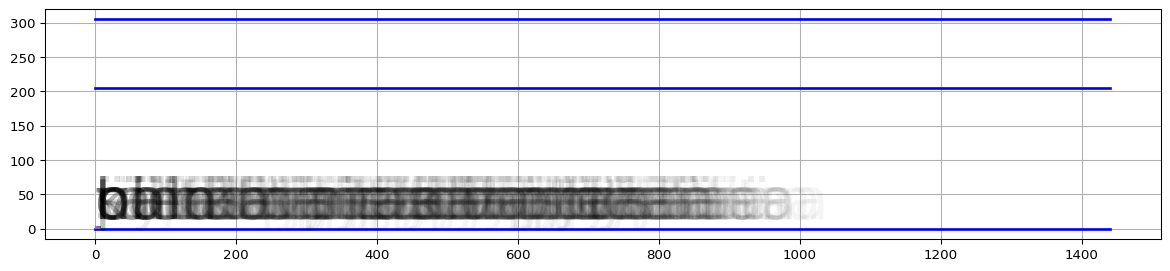

55.0 1.3957837460332778 5.688574505580574


In [1105]:
#plot phraseset space taken up on screen

#fig = plt.figure(figsize=(10, 2))
my_dpi=96
f=plt.figure(figsize=(1440/my_dpi, 305/my_dpi), dpi=my_dpi)
base = np.linspace(0,1440,50)
#ax = plt.gca()
a=np.empty(len(base)) #top of screen line
a.fill(0)
plt.plot(base, a, 'b-', linewidth=2)
a=np.empty(len(base)) #end of edit area line
a.fill(205)
plt.plot(base, a, 'b-', linewidth=2)
a=np.empty(len(base)) #end of edit area line
a.fill(305)
plt.plot(base, a, 'b-', linewidth=2)
#ax.set_facecolor('#09037D')

max_height=-1
max_width=-1
for i in dfsent['sentence'].unique():
    #plt.annotate(i, # this is the text
    #                     (10,15),
    #                    ha='left', fontsize=40, 
    #             color="white", alpha=0.1, bbox=dict(linestyle='dotted', facecolor=(1,0,0,0.01), edgecolor='red', linewidth=1))

    t = plt.text(0, 15, i, fontsize=43, color='black', alpha=0.04)    
    f.canvas.draw()
    r = f.canvas.get_renderer(f)
    bbox = t.get_window_extent(r)
    transf = ax.transData.inverted()
    cc = bbox.transformed(transf)
    plt.plot([cc.x0, cc.x0, cc.x1, cc.x1, cc.x0],
         [cc.y0, cc.y1, cc.y1, cc.y0, cc.y0])
    if cc.height>max_height:
        max_height=cc.height
    if cc.width>max_width:
        max_width=cc.width
    
    #a=np.empty(len(gazedata)) #threshold line
#a.fill(-925)
#plt.plot(gazedata['trialtime'], a, color="red", linestyle="dashed", linewidth=1)
#a=np.empty(len(gazedata)) #top of keyboard line
plt.grid()
plt.show()

print(bbox.height, max_height, max_width)

3081.007288 -10595.83598 1173.12 381.29
3144.41068 -75441.94778 1468.77 843.28
39578.667 -80.0 5447.05 4276.86
275707


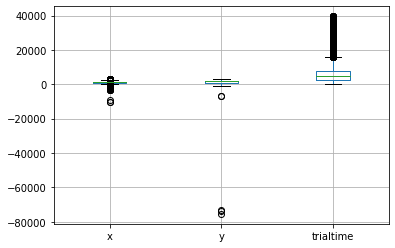

In [1106]:
#data integrity check
dfgaze.boxplot(column=["x","y", "trialtime"])
print(dfgaze["x"].max(), dfgaze["x"].min(), round(dfgaze["x"].mean(), 2), round(dfgaze["x"].std(),2))
print(dfgaze["y"].max(), dfgaze["y"].min(), round(dfgaze["y"].mean(), 2), round(dfgaze["y"].std(),2))
print(dfgaze["trialtime"].max(), dfgaze["trialtime"].min(), round(dfgaze["trialtime"].mean(), 2), round(dfgaze["trialtime"].std(),2))
print(len(dfgaze))

1422.4219 17.929688 841.1 400.56
2545.0 1641.875 2016.07 215.03
38722 0 4721.8 3966.69
32488


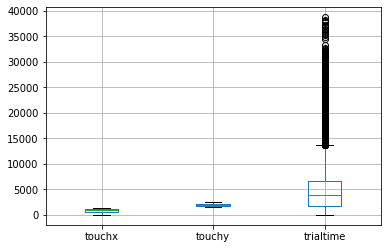

In [1107]:
dftyping.boxplot(column=["touchx","touchy", "trialtime"])
print(dftyping["touchx"].max(), dftyping["touchx"].min(), round(dftyping["touchx"].mean(), 2), round(dftyping["touchx"].std(),2))
print(dftyping["touchy"].max(), dftyping["touchy"].min(), round(dftyping["touchy"].mean(), 2), round(dftyping["touchy"].std(),2))
print(dftyping["trialtime"].max(), dftyping["trialtime"].min(), round(dftyping["trialtime"].mean(), 2), round(dftyping["trialtime"].std(),2))
print(len(dftyping))

In [1108]:
#fix values in gaze set
dfgaze.drop(dfgaze[dfgaze['trialtime'] < 0].index, inplace = True)
#dfgaze.drop(dfgaze[dfgaze['x'] < 0].index, inplace = True)
#dfgaze.drop(dfgaze[dfgaze['x'] > 1439].index, inplace = True)
#dfgaze.drop(dfgaze[dfgaze['y'] < 0].index, inplace = True)
#dfgaze.drop(dfgaze[dfgaze['y'] > 2559].index, inplace = True)

#dfgaze.loc[(dfgaze.y <0),'y']=0
#dfgaze.loc[(dfgaze.y >2560-1),'y']=2560-1
#dfgaze.loc[(dfgaze.x <0),'x']=0
#dfgaze.loc[(dfgaze.x >1440-1),'x']=1440-1

print(round(dfgaze["x"].max(), 2), round(dfgaze["x"].min(), 2), round(dfgaze["x"].mean(), 2), round(dfgaze["x"].std(),2))
print(round(dfgaze["y"].max(), 2), round(dfgaze["y"].min(), 2), round(dfgaze["y"].mean(), 2), round(dfgaze["y"].std(),2))
print(round(dfgaze["trialtime"].max(), 2), round(dfgaze["trialtime"].min(), 2), round(dfgaze["trialtime"].mean(), 2), round(dfgaze["trialtime"].std(),2))

print(len(dfgaze))

3081.01 -10595.84 1172.01 381.33
3144.41 -75441.95 1465.04 845.04
39578.67 0.0 5493.05 4265.02
273415


In [1109]:
user_id = 120
block = 1
#sentence=74

#appropriate sentences for this user
valid_sentences = dfjoined.loc[(dfjoined['id']==user_id) & (dftyping['block']==block)].drop_duplicates(subset=['sentence_n'])['sentence_n'].tolist()
print(valid_sentences)

#user_type = dftyping.loc[(dftyping['id'] == user_id) & (dftyping['block'] == block)]
#user_type = user_type[user_type['sentence_n'].isin(valid_sentences)]
#user_gaze = dfgaze.loc[(dfgaze['id'] == user_id) & (dfgaze['block'] ==block)]
#user_gaze = user_gaze[user_gaze['sentence_n'].isin(valid_sentences)]

user_type = pd.merge(dftyping.loc[(dftyping['block']==1)], dfjoined, \
                    left_on=['id', 'block','sentence_n'], \
                    right_on=['id', 'block','sentence_n'], \
                    how='inner')

user_gaze = pd.merge(dfgaze.loc[(dfgaze['block']==1)], dfjoined, \
                    left_on=['id', 'block','sentence_n'], \
                    right_on=['id', 'block','sentence_n'], \
                    how='inner')

user_gaze['y']=-1*user_gaze['y']
user_gaze['smoothy'] = user_gaze['y'].map(lambda x: -750 if x>=-925 else -1750)
user_type['touchy']=-1*user_type['touchy']

[66, 52, 3, 56, 54, 51, 75, 1, 53, 74, 32, 17, 13, 43, 20, 11, 48, 36, 49, 26, 38, 15, 12]


In [1110]:
print(len(user_type))
user_type.head()


13809


systime   id  block  sentence_n  trialtime event  \
0  1536560828358  120      1          66          0     m   
1  1536560828816  120      1          66        458     i   
2  1536560829442  120      1          66       1084     t   
3  1536560830052  120      1          66       1694     ä   
4  1536560830771  120      1          66       2413         

                          layout message      touchx    touchy  \
0  qwertyuiopåasdfghjklöäzxcvbnm       m  1158.39840 -2213.750   
1  qwertyuiopåasdfghjklöäzxcvbnm      mi   987.18750 -1766.250   
2  qwertyuiopåasdfghjklöäzxcvbnm     mit   613.12500 -1821.250   
3  qwertyuiopåasdfghjklöäzxcvbnm    mitä  1378.47660 -1956.875   
4  qwertyuiopåasdfghjklöäzxcvbnm   mitä    815.27344 -2451.250   

           sentence  slen  
0  mitä sinä luulet    16  
1  mitä sinä luulet    16  
2  mitä sinä luulet    16  
3  mitä sinä luulet    16  
4  mitä sinä luulet    16

In [1111]:
print(len(user_gaze))
user_gaze.head()

152700


id  block  sentence_n  trialtime            x            y  \
0  133      1          14     32.000  1795.145444 -1959.137992   
1  133      1          14     65.333  1797.746648 -1960.109828   
2  133      1          14     98.667  1790.680728 -1959.243692   
3  133      1          14    132.000  1781.073316 -1958.664456   
4  133      1          14    165.333  1784.098724 -1966.622760   

                  sentence  slen  smoothy  
0  pääsen perille tunnissa    23    -1750  
1  pääsen perille tunnissa    23    -1750  
2  pääsen perille tunnissa    23    -1750  
3  pääsen perille tunnissa    23    -1750  
4  pääsen perille tunnissa    23    -1750

In [1112]:
def plotusersentence(gdata, tdata, sdata, user, sent_n):
    typedata = tdata.loc[(tdata['sentence_n'] == sent_n) & (tdata['id']==user)]
    gazedata = gdata.loc[(gdata['sentence_n'] == sent_n) & (gdata['id']==user)]
    
    fig = plt.figure(figsize=(16, 5))
    #plt.gca().xaxis.grid(False)
    #plt.gca().yaxis.grid(False)
    plt.ylim(-2560, 100) 
    
    #plt.plot(gazedata['trialtime'], gazedata['smoothy'])
    plt.plot(gazedata['trialtime'], gazedata['y'], color="orange", linestyle=(0,(9,3,3,3)), zorder=3, linewidth=1)
    plt.plot(gazedata['trialtime'], gazedata['y'], color="black", marker="o", zorder=4, alpha=0.1)
    
    # Plot axes labels and show the plot
    plt.xlabel('trial time')
    plt.ylabel('y coordinate')

    a=np.empty(len(gazedata)) #top of screen line
    a.fill(0)
    plt.plot(gazedata['trialtime'], a, 'b-')
    a=np.empty(len(gazedata)) #end of edit area line
    a.fill(-212)
    plt.plot(gazedata['trialtime'], a, 'b-')
    a=np.empty(len(gazedata)) #threshold line
    a.fill(screen_midpoint)
    plt.plot(gazedata['trialtime'], a, color="red", linestyle="dashed", linewidth=1)
    a=np.empty(len(gazedata)) #top of keyboard line
    a.fill(-1638)
    plt.plot(gazedata['trialtime'], a, 'b-')
    
    plt.plot(typedata['trialtime'], typedata['touchy'], 'r.', zorder=5)


    for index, row in typedata.iterrows():
        #print(row['c1'], row['c2'])
        label = row['event']
        if label==" ":
            label=u"\u21D2"
        if label=="B":
            label=u"\u2190"

        plt.annotate(label, # this is the text
                     (row['trialtime'],0), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-15), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
       # plt.annotate(row['trialtime'], # this is the text
       #              (row['trialtime'],-500), # these are the coordinates to position the label
       #              textcoords="offset points", # how to position the text
       #              xytext=(0,-35), # distance from text to points (x,y)
       #              ha='center') # horizontal alignment can be left, right or center
    plt.vlines(typedata['trialtime'], -2560, -250, linestyle="dashed", linewidth=1, zorder=1)
    plt.title("User "+str(user)+", block: 1, phrase "+str(sent_n)+": "+sdata.iloc[sent_n-1]['sentence'], color='purple', size=20)
    #plt.grid()
    plt.show()

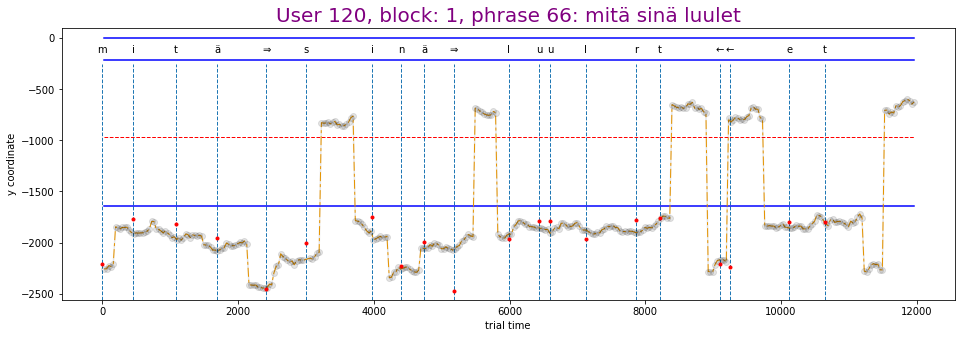

In [700]:
plotusersentence(user_gaze, user_type, dfsent, 120, 66)

Sentence  66


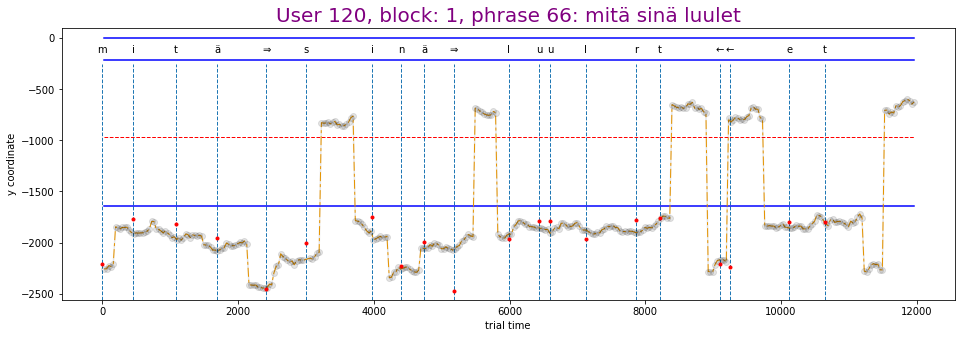

Sentence  52


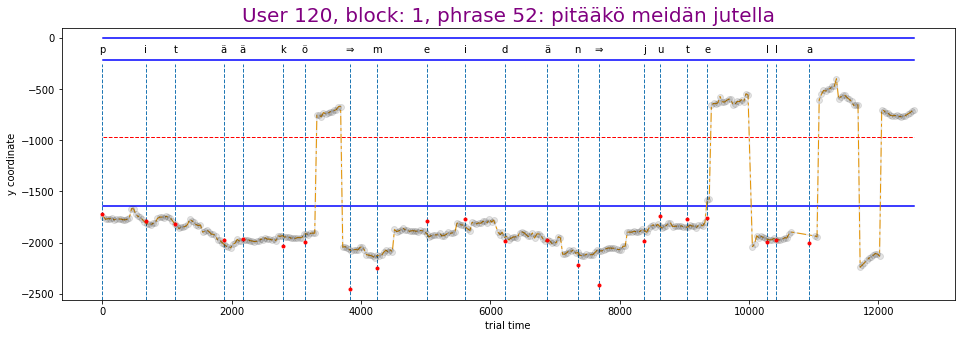

Sentence  3


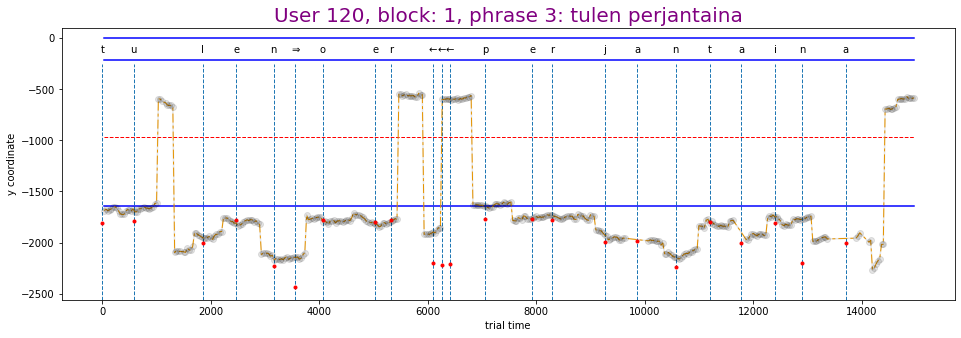

Sentence  56


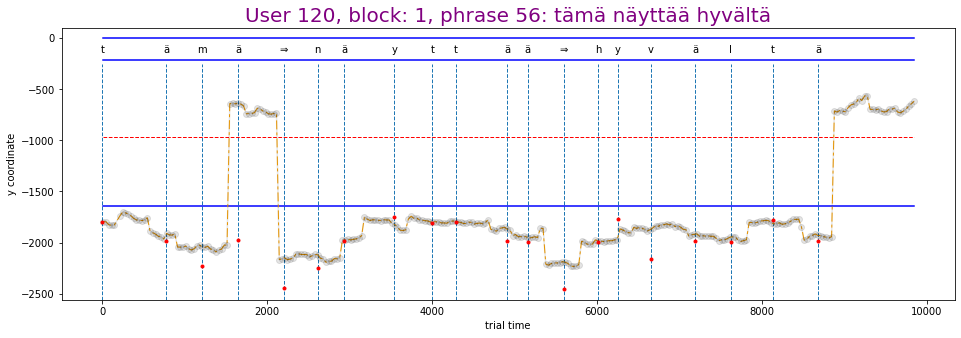

Sentence  54


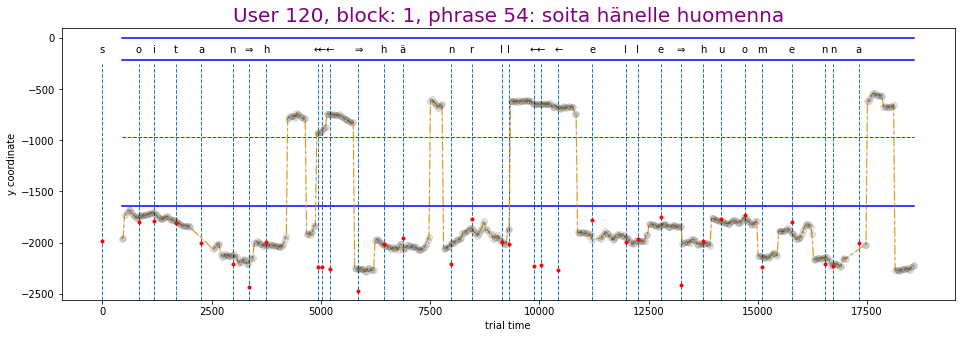

Sentence  51


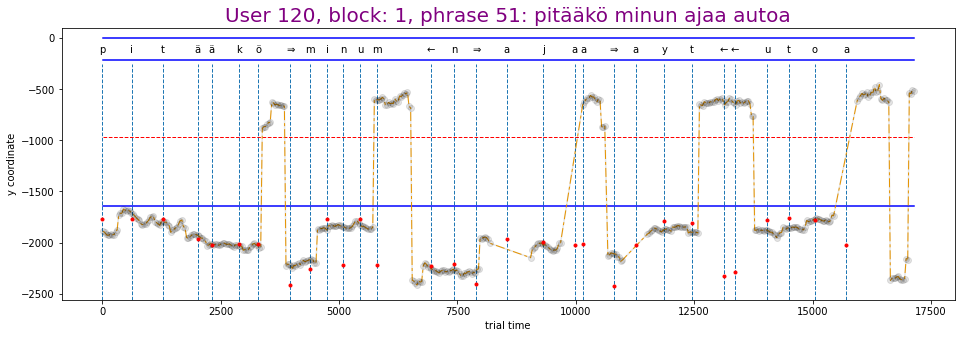

Sentence  75


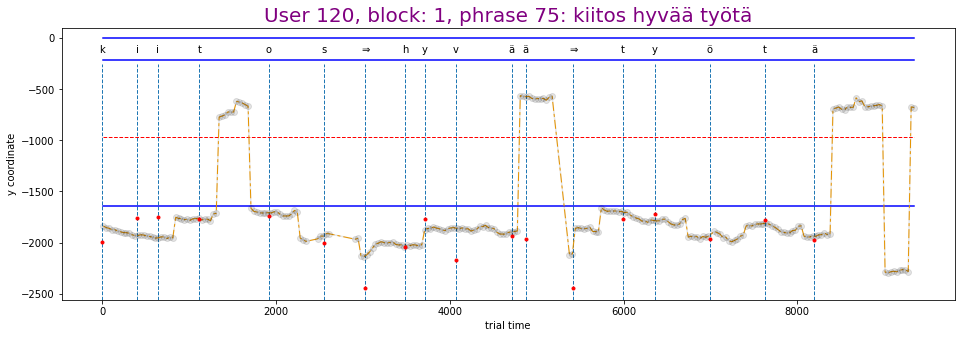

Sentence  1


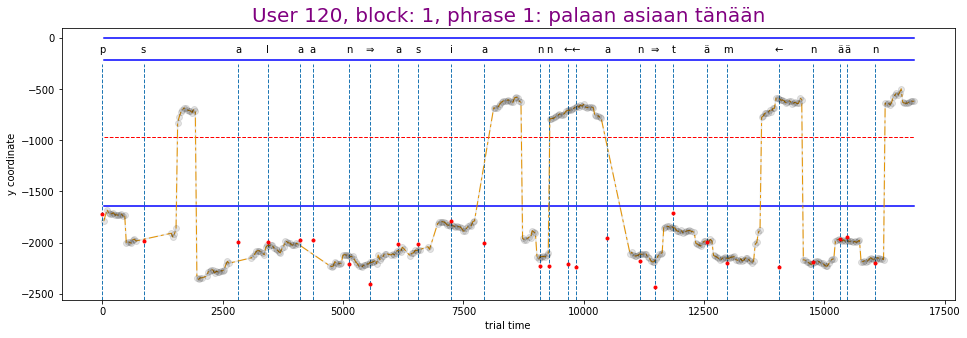

Sentence  53


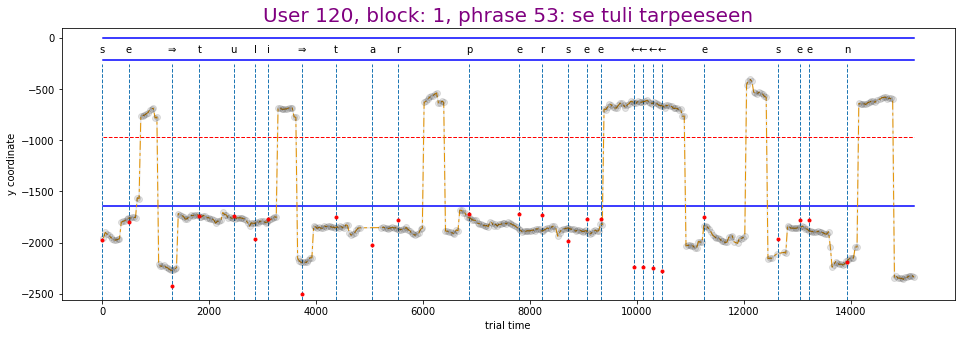

Sentence  74


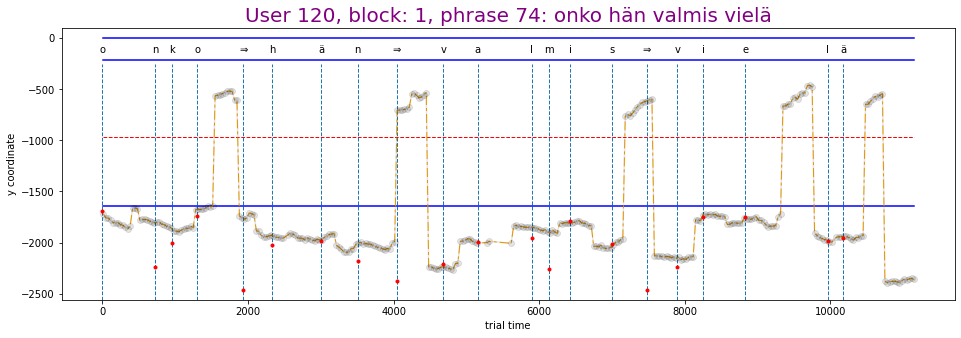

Sentence  32


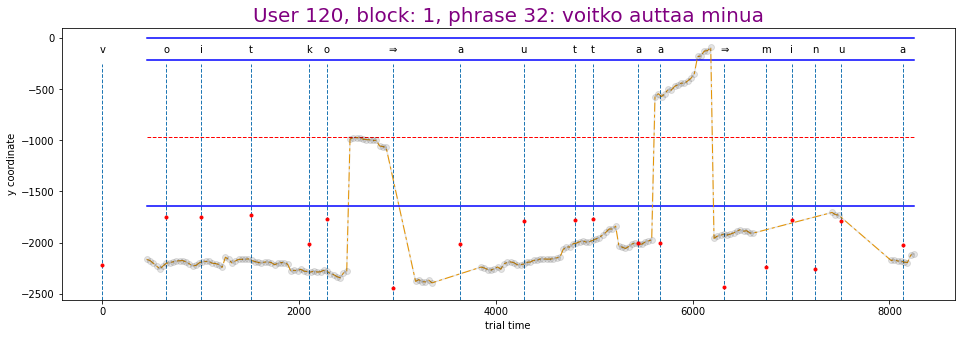

Sentence  17


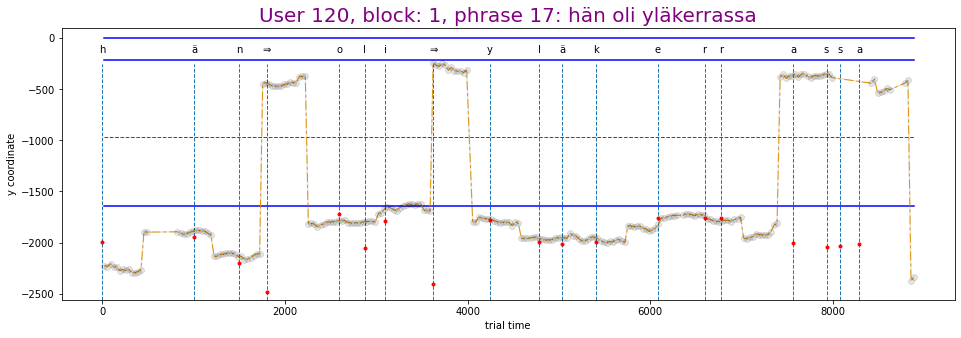

Sentence  13


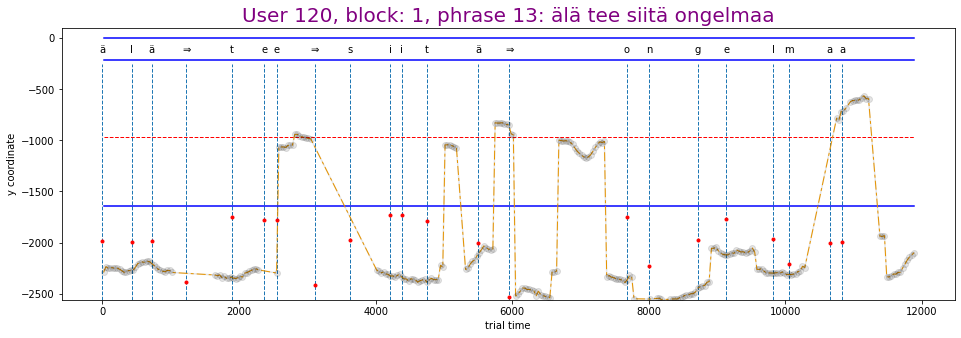

Sentence  43


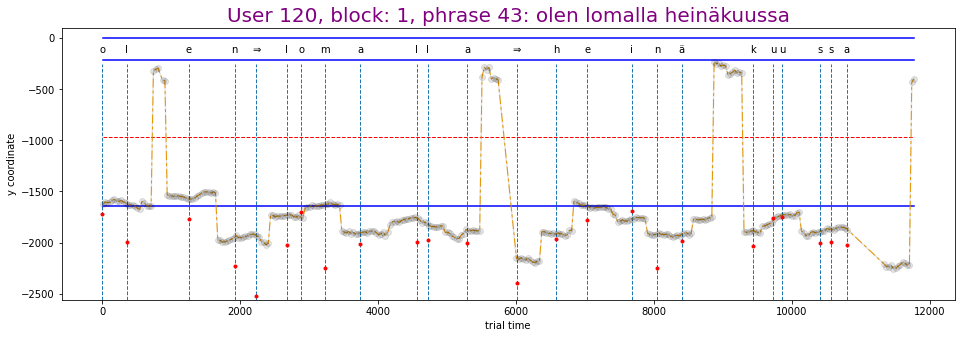

Sentence  20


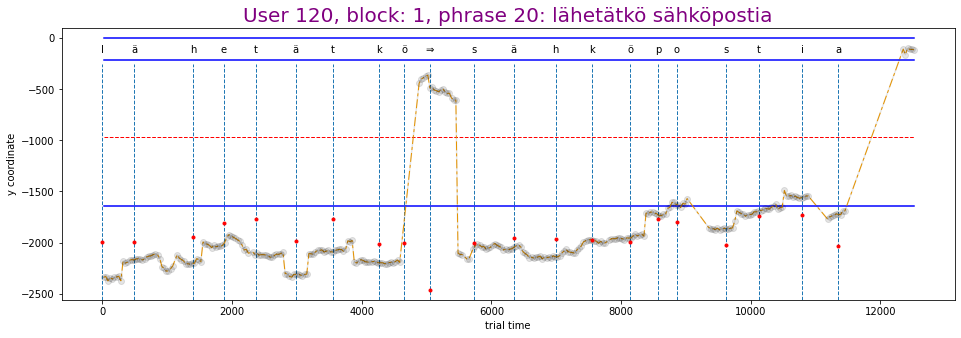

Sentence  11


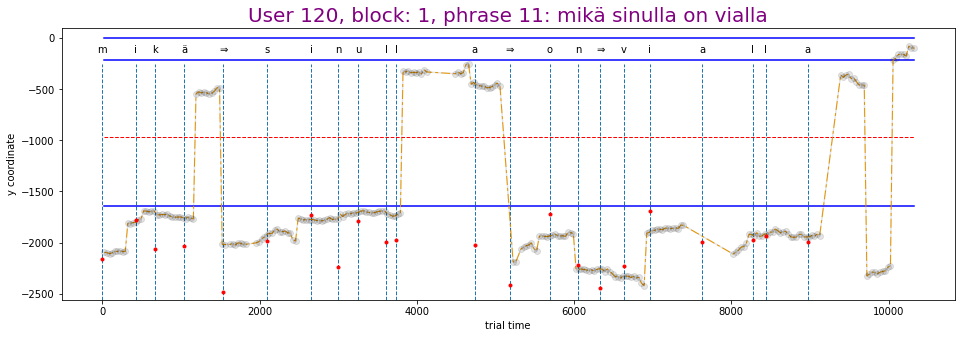

Sentence  48


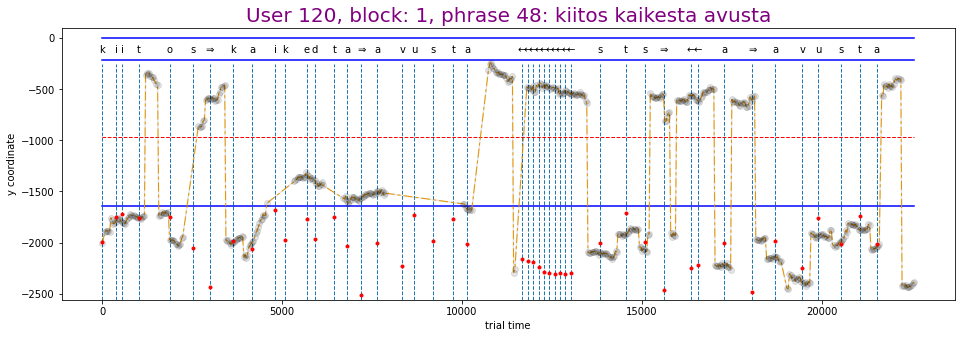

Sentence  36


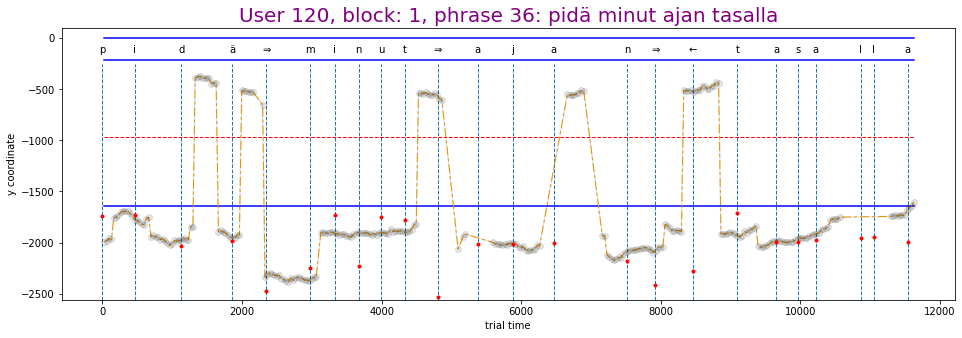

Sentence  49


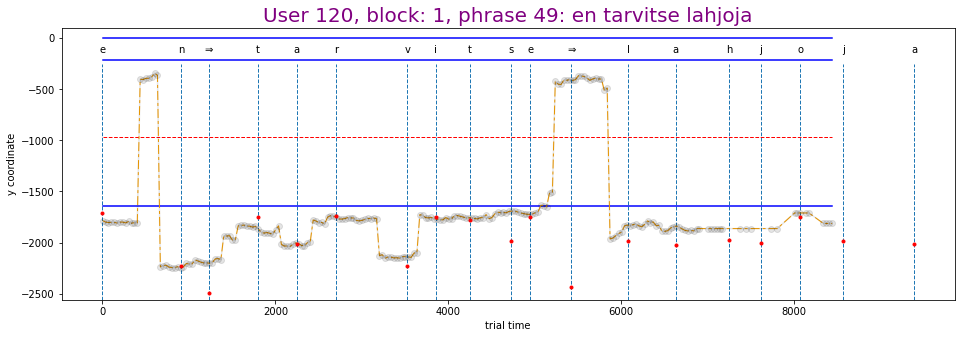

In [718]:
ss = dfjoined.loc[(dfjoined['id']==120) & (dfjoined['block']==1)]['sentence_n'].tolist()
for i in range(len(ss)):
    print("Sentence ", ss[i])
    plotusersentence(user_gaze, user_type, dfsent, 120, ss[i])
    

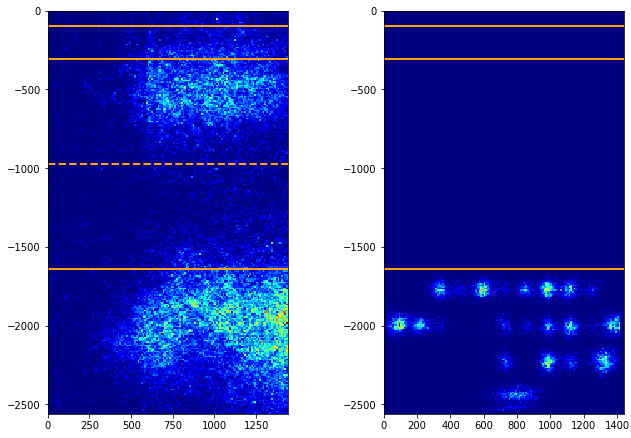

In [1113]:
#analysis of gaze Y distributions

ho = np.linspace(0,1440)
ve00 = np.linspace(-95,-95)
ve1 = np.linspace(-307,-307)
ve2 = np.linspace(screen_midpoint,screen_midpoint)
ve3 = np.linspace(-1638,-1638)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
#fig.suptitle('Ga')
ax1.hist2d(x=user_gaze['x'],y=user_gaze['y'], bins=(144,256),
            range=[[0, 1440], [-2560, 0]], 
            cmap=plt.cm.jet)

ax1.plot(ho,ve00, linestyle="solid", linewidth=2, zorder=1, color="orange")
ax1.plot(ho,ve1, linestyle="solid", linewidth=2, zorder=1, color="orange")
ax1.plot(ho,ve2, linestyle="dashed", linewidth=2, zorder=1, color="orange")
ax1.plot(ho,ve3, linestyle="solid", linewidth=2, zorder=1, color="orange")

ax2.hist2d(x=user_type['touchx'],y=user_type['touchy'], bins=(144, 256),
          range=[[0, 1440], [-2560, 0]], 
           cmap=plt.cm.jet)
ax2.plot(ho,ve00, linestyle="solid", linewidth=2, zorder=1, color="orange")
ax2.plot(ho,ve1, linestyle="solid", linewidth=2, zorder=1, color="orange")
#ax2.plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
ax2.plot(ho,ve3, linestyle="solid", linewidth=2, zorder=1, color="orange")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


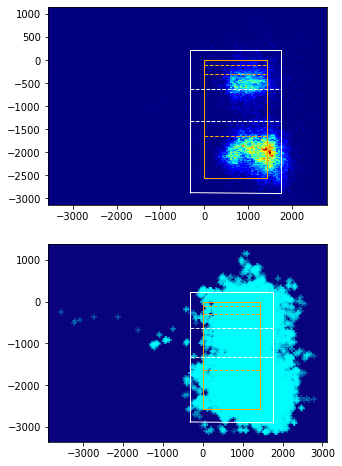

In [1134]:
#ho = np.linspace(user_gaze['x'].min(),user_gaze['x'].max())
ho = np.linspace(0,1440)
h1 = np.linspace(-317, 1440+317)

ve0 = np.linspace(-0,-0)
ve00 = np.linspace(-95,-95)
ve1 = np.linspace(-307,-307)
ve2 = np.linspace(screen_midpoint,screen_midpoint)
ve3 = np.linspace(-1638,-1638)
ve4 = np.linspace(-2559,-2559)

#expanded area according to paper

exTop = np.linspace(-95+317, -95+317)
exTopDown = np.linspace(-307-317, -307-317)
exBottomUp = np.linspace(-1638+317,-1638+317)
exBottom = np.linspace(-2559-317,-2579-317)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,8))


#plt.scatter(x=user_gaze['x'],y=user_gaze['y'], alpha = 0.1)
ax1.hist2d(x=user_gaze['x'],y=user_gaze['y'], bins=(144,256), cmap=plt.cm.jet)

ax1.plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="orange")
ax1.plot(ho,ve00, linestyle="dashed", linewidth=1, zorder=1, color="orange")

ax1.plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#ax1.plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
ax1.plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="orange")
ax1.plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="orange")
ax1.vlines([0,1439], -2559, 0, linestyle="solid", linewidth=1, zorder=1, color="orange")

ax2.scatter(x=user_gaze['x'],y=user_gaze['y'], alpha = 0.3, color="cyan", marker="+")
ax2.set_facecolor('#09037D')
ax2.plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="orange")
ax2.plot(ho,ve00, linestyle="dashed", linewidth=1, zorder=1, color="orange")

ax2.plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#ax2.plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
ax2.plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="orange")
ax2.plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="orange")
ax2.vlines([0,1439], -2559, 0, linestyle="solid", linewidth=1, zorder=1, color="orange")

#expanded area bounds
ax1.plot(h1,exTop, linestyle="solid", linewidth=1, zorder=1, color="white")
ax1.plot(h1,exTopDown, linestyle="dashed", linewidth=1, zorder=1, color="white")
ax1.plot(h1,exBottomUp, linestyle="dashed", linewidth=1, zorder=1, color="white")
ax1.plot(h1,exBottom, linestyle="solid", linewidth=1, zorder=1, color="white")
ax1.vlines([-317,1439+317], -2559-317, 317-95, linestyle="solid", linewidth=1, zorder=1, color="white")

ax2.plot(h1,exTop, linestyle="solid", linewidth=1, zorder=1, color="white")
ax2.plot(h1,exTopDown, linestyle="dashed", linewidth=1, zorder=1, color="white")
ax2.plot(h1,exBottomUp, linestyle="dashed", linewidth=1, zorder=1, color="white")
ax2.plot(h1,exBottom, linestyle="solid", linewidth=1, zorder=1, color="white")
ax2.vlines([-317,1439+317], -2559-317, 317-95, linestyle="solid", linewidth=1, zorder=1, color="white")


plt.show()

In [1140]:
#gaze points fitting inside the expanded boundaries
len(user_gaze.loc[(user_gaze['x'] > 0-317) & 
              (user_gaze['x'] < 1439+317) & 
              (user_gaze['y'] < -95+317) &
              (user_gaze['y'] > -2559-317)])/len(user_gaze)

0.9346954813359528

71 71
[100. 110. 120. 130. 140. 150. 160. 170. 180. 190. 200. 210. 220. 230.
 240. 250. 260. 270. 280. 290. 300. 310. 320. 330. 340. 350. 360. 370.
 380. 390. 400. 410. 420. 430. 440. 450. 460. 470. 480. 490. 500. 510.
 520. 530. 540. 550. 560. 570. 580. 590. 600. 610. 620. 630. 640. 650.
 660. 670. 680. 690. 700. 710. 720. 730. 740. 750. 760. 770. 780. 790.
 800.]


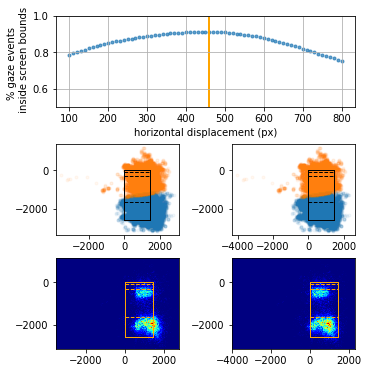

In [1141]:
#calculate points that are out of bounds
start = 100
end = 800
step = 10
points_to_calc = round((end-start)/step +1)
coordsin=[]

xlabels = np.linspace(start,end,points_to_calc)
for i in range (points_to_calc):
    xmodifier = start+step*i
    userg_out = user_gaze.loc[(user_gaze.y >0) | (user_gaze.y <-2559) | (user_gaze.x -xmodifier <0 ) | (user_gaze.x -xmodifier >1439)]
    #print("valid coords at ",start+step*i , round((len(user_gaze)-len(userg_out))/len(user_gaze), 4))
    coordsin.append(round((len(user_gaze)-len(userg_out))/len(user_gaze), 4))

print (len(xlabels), len(coordsin))
print(xlabels)

#ho = np.linspace(user_gaze['x'].min(),user_gaze['x'].max())
ho = np.linspace(0,1440)

ve0 = np.linspace(-0,-0)
ve00 = np.linspace(-95,-95)

ve1 = np.linspace(-307,-307)
ve2 = np.linspace(screen_midpoint, screen_midpoint)
ve3 = np.linspace(-1638,-1638)
ve4 = np.linspace(-2559,-2559)
ve5 = np.linspace(460,460)
#fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5))
fig, axd = plt.subplot_mosaic([['top', 'top'],['left', 'right'], ['bl', 'br']],
                              constrained_layout=True, figsize=(5,5))

axd['top'].scatter(x=xlabels, y=coordsin, alpha=0.7, marker ='.')
axd['top'].set_ylim(0.5,1)
axd['top'].set_xlabel('horizontal displacement (px)')
axd['top'].set_ylabel('% gaze events \n inside screen bounds')
axd['top'].vlines([460], 0, 1, linestyle="solid", linewidth=2, zorder=1, color="orange")
axd['top'].grid()

#plt.scatter(x=user_gaze['x'],y=user_gaze['y'], alpha = 0.1)
#axd['left'].scatter(x=user_gaze['x'],y=user_gaze['y'], alpha = 0.3, color="cyan", marker="+")
#axd['left'].set_facecolor('#09037D')
#axd['left'].plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="orange")#Eaxd['left'].plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['left'].plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['left'].plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['left'].plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="orange")
#axd['left'].vlines([0,1440], -2560, 0, linestyle="solid", linewidth=1, zorder=1, color="orange")

#axd['right'].scatter(x=user_gaze['x']-460,y=user_gaze['y'], alpha = 0.3, color="cyan", marker="+")
#axd['right'].set_facecolor('#09037D')
#axd['right'].plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="orange")
#axd['right'].plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['right'].plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['right'].plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['right'].plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="orange")
#axd['right'].vlines([0,1440], -2560, 0, linestyle="solid", linewidth=1, zorder=1, color="orange")

for i in u_labels:
    axd['right'].scatter(user_gaze3.loc[user_gaze3['label']==i]['x'] , user_gaze3.loc[user_gaze3['label']==i]['y'], label = i, 
               alpha=0.05, marker='.')
axd['right'].plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="black")
axd['right'].plot(ho,ve00, linestyle="dashed", linewidth=1, zorder=1, color="black")

axd['right'].plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="black")
#axd['br'].plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['right'].plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="black")
axd['right'].plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="black")
axd['right'].vlines([0,1440], -2560, 0, linestyle="solid", linewidth=1, zorder=1, color="black")

for i in u_labels:
    axd['left'].scatter(user_gaze2.loc[user_gaze3['label']==i]['x'] , user_gaze2.loc[user_gaze3['label']==i]['y'], label = i, 
               alpha=0.05, marker='.')
axd['left'].plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="black")
axd['left'].plot(ho,ve00, linestyle="dashed", linewidth=1, zorder=1, color="black")

axd['left'].plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="black")
#axd['br'].plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['left'].plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="black")
axd['left'].plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="black")
axd['left'].vlines([0,1440], -2560, 0, linestyle="solid", linewidth=1, zorder=1, color="black")

axd['bl'].hist2d(x=user_gaze['x'],y=user_gaze['y'], bins=(144,256), cmap=plt.cm.jet)
axd['bl'].plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['bl'].plot(ho,ve00, linestyle="dashed", linewidth=1, zorder=1, color="orange")

axd['bl'].plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['bl'].plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['bl'].plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['bl'].plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['bl'].vlines([0,1440], -2560, 0, linestyle="solid", linewidth=1, zorder=1, color="orange")

axd['br'].hist2d(x=user_gaze['x']-460,y=user_gaze['y'], bins=(144,256), cmap=plt.cm.jet)
axd['br'].plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['br'].plot(ho,ve00, linestyle="dashed", linewidth=1, zorder=1, color="orange")

axd['br'].plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['br'].plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['br'].plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['br'].plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['br'].vlines([0,1440], -2560, 0, linestyle="solid", linewidth=1, zorder=1, color="orange")

plt.show()





2793.25 -3566.27 1163.95 396.89
1157.91 -3135.67 -1562.15 768.68
152700


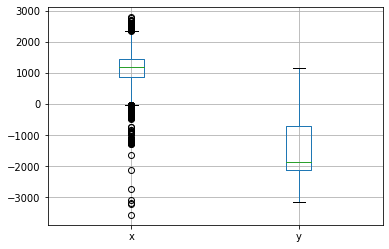

In [1142]:
#pre-cleaning stats
user_gaze.boxplot(column=["x","y"])
print(round(user_gaze["x"].max(), 2), round(user_gaze["x"].min(), 2), round(user_gaze["x"].mean(), 2), round(user_gaze["x"].std(),2))
print(round(user_gaze["y"].max(), 2), round(user_gaze["y"].min(), 2), round(user_gaze["y"].mean(), 2), round(user_gaze["y"].std(),2))
print(len(user_gaze))


1422.4219 17.929688
-1661.875 -2545.0


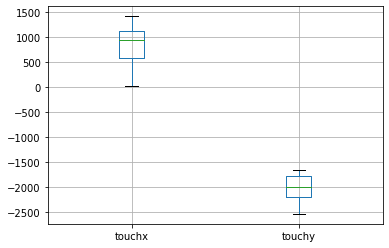

In [1143]:
user_type.boxplot(column=["touchx","touchy"])
print(user_type["touchx"].max(), user_type["touchx"].min())
print(user_type["touchy"].max(), user_type["touchy"].min())
#print(user_type["trialtime"].max(), user_type["trialtime"].min())

[0 1 0 ... 0 0 0]


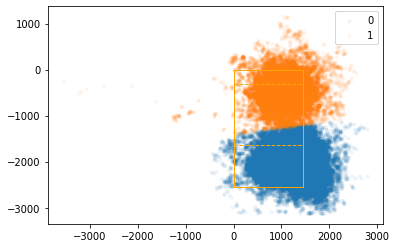

In [1144]:
#how many eye-up gazes are inside the phrase x boundary?

#first divide in 2 clusters
from sklearn.cluster import KMeans

user_gaze2 = user_gaze.sample(round(len(user_gaze)*1))

X = user_gaze2[['x','y']]
clusters = KMeans(n_clusters= 2).fit_predict(X)

#print(X)

print(clusters)

#print(kmeans)
user_gaze2['label'] = clusters

#Getting unique labels
u_labels = np.unique(clusters)
 
#plotting the results:
for i in u_labels:
    plt.scatter(user_gaze2.loc[user_gaze2['label']==i]['x'] , user_gaze2.loc[user_gaze2['label']==i]['y'], label = i, 
               alpha=0.05, marker='.')
plt.plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="orange")
plt.plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['br'].plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
plt.plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="orange")
plt.plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="orange")
plt.vlines([0,1440], -2560, 0, linestyle="solid", linewidth=1, zorder=1, color="orange")
plt.legend()
plt.show()

In [1145]:
#percentage of upper gazes within boundary
print(len(user_gaze2.loc[(user_gaze2['label']==1) & (user_gaze2['x']<1440) & (user_gaze2['x']>=1) ])/len(user_gaze2.loc[(user_gaze2['label']==1)]))
user_gaze3 = user_gaze2.copy()
user_gaze3['x']=user_gaze3['x']-460
print(len(user_gaze3.loc[(user_gaze3['label']==1) & (user_gaze3['x']<1440) & (user_gaze3['x']>=1) ])/len(user_gaze3.loc[(user_gaze3['label']==1)]))

user_gaze3['x'].max()

#go to optimal displacement cell to do the graph

0.8995265881316745
0.9567543763073875


2333.245208

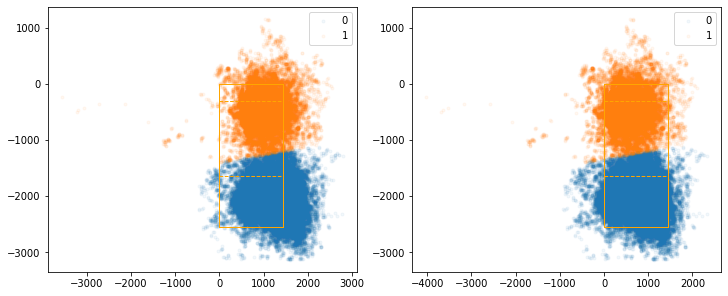

In [1146]:
fig, axd = plt.subplot_mosaic([['left', 'right']],
                              constrained_layout=True, figsize=(10,4))
for i in u_labels:
    axd['right'].scatter(user_gaze3.loc[user_gaze3['label']==i]['x'] , user_gaze3.loc[user_gaze3['label']==i]['y'], 
                         label = i, 
               alpha=0.05, marker='.')
axd['right'].plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['right'].plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['br'].plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['right'].plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['right'].plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['right'].vlines([0,1440], -2560, 0, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['right'].legend()

for i in u_labels:
    axd['left'].scatter(user_gaze2.loc[user_gaze2['label']==i]['x'] , user_gaze2.loc[user_gaze2['label']==i]['y'], 
                        label = i, 
               alpha=0.05, marker='.')
axd['left'].plot(ho,ve0, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['left'].plot(ho,ve1, linestyle="dashed", linewidth=1, zorder=1, color="orange")
#axd['br'].plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['left'].plot(ho,ve3, linestyle="dashed", linewidth=1, zorder=1, color="orange")
axd['left'].plot(ho,ve4, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['left'].vlines([0,1440], -2560, 0, linestyle="solid", linewidth=1, zorder=1, color="orange")
axd['left'].legend()
                               
plt.show()

In [1147]:
#percent of upper cluster 
q75, q25 = np.percentile(user_gaze3['x'], [75 ,25])
print (np.median(user_gaze3['x']))
print (q75, q25)

#max phrase limit 1041px
print (len(user_gaze3.loc[user_gaze3['x']<=1041])/len(user_gaze3))

720.411648
1000.9047250000001 400.609104
0.787033398821218


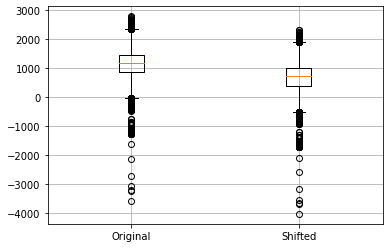

In [1148]:
data = [user_gaze2['x'], user_gaze3['x']]
fig7, ax7 = plt.subplots()
#ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)
ax7.grid()
ax7.set_xticks([1, 2], ['Original', 'Shifted'])

plt.show()

In [1149]:
#clean the gaze data

#must clean dfgaze and then recalc user_gaze...

#shift data
dfgaze['x']=dfgaze['x']-460

#clear out everything NOT in the device bounds
dfgaze.drop(dfgaze[dfgaze['x'] < 0].index, inplace = True)
dfgaze.drop(dfgaze[dfgaze['x'] > 1439].index, inplace = True)
dfgaze.drop(dfgaze[dfgaze['y'] < 0].index, inplace = True)
dfgaze.drop(dfgaze[dfgaze['y'] > 2559].index, inplace = True)

#recalc user_gaze
user_gaze = pd.merge(dfgaze.loc[(dfgaze['block']==1)], dfjoined, \
                    left_on=['id', 'block','sentence_n'], \
                    right_on=['id', 'block','sentence_n'], \
                    how='inner')

user_gaze['y']=-1*user_gaze['y']
user_gaze['smoothy'] = user_gaze['y'].map(lambda x: -750 if x>=-925 else -1750)


#user_gaze_clean = user_gaze.loc[(user_gaze.y <0) & (user_gaze.y >-2560) & (user_gaze.x >0 ) & (user_gaze.x <1440)]

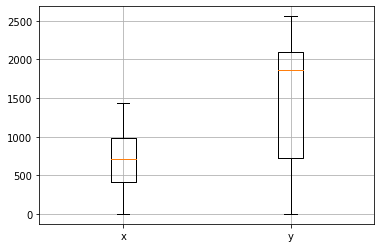

1439.0 0.11 705.2 348.86
2558.93 0.13 1557.23 723.67
139179


In [1151]:
#post-cleaning stats
user_gaze['y']=-1*user_gaze['y']

#user_gaze.boxplot(column=["x","y"])

data = [user_gaze['x'], user_gaze['y']]
fig7, ax7 = plt.subplots()
#ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)
ax7.grid()
ax7.set_xticks([1, 2], ['x', 'y'])

plt.show()

print(round(user_gaze["x"].max(), 2), round(user_gaze["x"].min(), 2), round(user_gaze["x"].mean(), 2), round(user_gaze["x"].std(),2))
print(round(user_gaze["y"].max(), 2), round(user_gaze["y"].min(), 2), round(user_gaze["y"].mean(), 2), round(user_gaze["y"].std(),2))
print(len(user_gaze))

user_gaze['y']=-1*user_gaze['y']


In [1152]:
#percent of upper cluster 
q75, q25 = np.percentile(user_gaze['x'], [75 ,25])
print (np.median(user_gaze['x']))
print (q75, q25)

716.45946
983.430568 418.45677200000006


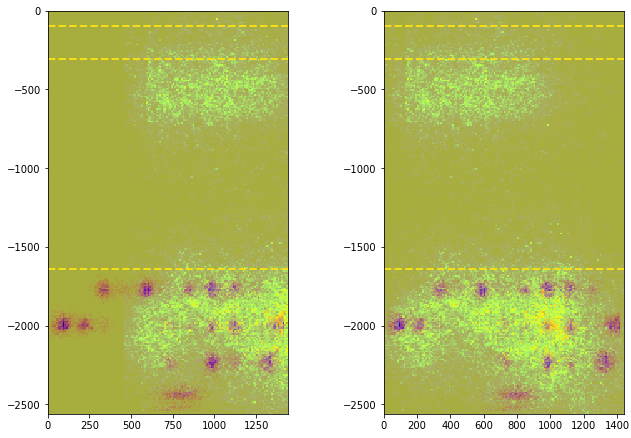

In [1153]:
#re-analysis of gaze Y distributions

ho = np.linspace(0,1440)
ve00 = np.linspace(-95,-95)

ve1 = np.linspace(-307,-307)
ve2 = np.linspace(-925,-925)
ve3 = np.linspace(-1638,-1638)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
#fig.suptitle('Ga')

ax1.hist2d(x=user_gaze['x']+460,y=user_gaze['y'], bins=(144,256),
            range=[[0, 1440], [-2560, 0]], 
            cmap=plt.cm.jet)
ax1.plot(ho,ve00, linestyle="dashed", linewidth=2, zorder=1, color="orange")

ax1.plot(ho,ve1, linestyle="dashed", linewidth=2, zorder=1, color="orange")
#ax1.plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
ax1.plot(ho,ve3, linestyle="dashed", linewidth=2, zorder=1, color="orange")


ax1.hist2d(x=user_type['touchx'],y=user_type['touchy'], bins=(144, 256),
          range=[[0, 1440], [-2560, 0]], 
           cmap=plt.cm.plasma_r, alpha = 0.7)



ax2.hist2d(x=user_gaze['x'],y=user_gaze['y'], bins=(144,256),
            range=[[0, 1440], [-2560, 0]], 
            cmap=plt.cm.jet)
ax2.plot(ho,ve00, linestyle="dashed", linewidth=2, zorder=1, color="orange")

ax2.plot(ho,ve1, linestyle="dashed", linewidth=2, zorder=1, color="orange")
#ax2.plot(ho,ve2, linestyle="dashed", linewidth=1, zorder=1, color="orange")
ax2.plot(ho,ve3, linestyle="dashed", linewidth=2, zorder=1, color="orange")

ax2.hist2d(x=user_type['touchx'],y=user_type['touchy'], bins=(144, 256),
          range=[[0, 1440], [-2560, 0]], 
           cmap=plt.cm.plasma_r, alpha = 0.7)




plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [ ]:
#data augmentation - fix missing gaze data issue

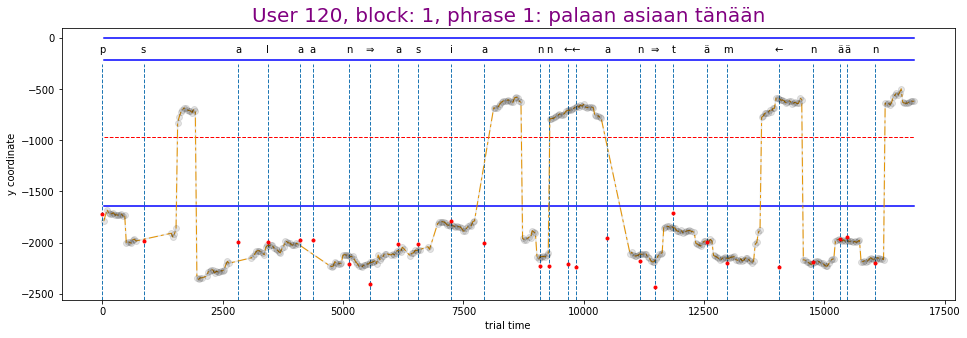

In [1155]:
#case in point: 
plotusersentence(user_gaze, user_type, dfsent, 120, 1)

In [1156]:
#data augmentation: investigate typical spacing between gaze points
dfgaze2 = dfgaze.copy()
dfgaze2 = dfgaze2.loc[dfgaze2.block==1]
dfgaze2['prev_trialtime'] = dfgaze2['trialtime'].shift(1)
prev_s = -1
prev_u = -1
for idx, row in dfgaze2.iterrows():
    if row['sentence_n'] != prev_s or row['id'] != prev_u:
        #print ('prev = ', prev_s, ' now at ', row['sentence'])
        dfgaze2['prev_trialtime'][idx] = np.NaN
    prev_s = row['sentence_n']
    prev_u = row['id']
#dfgaze2 = dfgaze2.dropna()
dfgaze2['timediff']=dfgaze2['trialtime']-dfgaze2['prev_trialtime']
dfgaze2.reset_index(drop=True, inplace=True)
dfgaze2.head(5)


/var/folders/cq/dpv74_vx6z763s2ht4_54zx1tyht7_/T/ipykernel_36302/3800346065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgaze2['prev_trialtime'][idx] = np.NaN


id  block  sentence_n  trialtime            x            y  \
0  133      1          14     32.000  1335.145444  1959.137992   
1  133      1          14     65.333  1337.746648  1960.109828   
2  133      1          14     98.667  1330.680728  1959.243692   
3  133      1          14    132.000  1321.073316  1958.664456   
4  133      1          14    165.333  1324.098724  1966.622760   

   prev_trialtime  timediff  
0             NaN       NaN  
1          32.000    33.333  
2          65.333    33.334  
3          98.667    33.333  
4         132.000    33.333

39.16478530572207 60.55760621627701 0.3181543862704584
33.33299999999872 4800.0
33.333000000000084
33.33299999999963 33.33400000000256


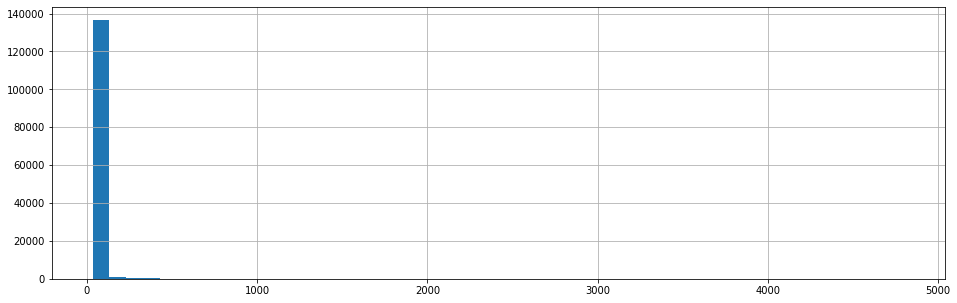

id  block  sentence_n  trialtime            x            y  \
25      133      1          14    898.667    11.480928   800.159840   
26      133      1          14   1098.667   292.306464  2061.982280   
247     133      1          14   8765.333  1188.423108  2546.806436   
417     133      1          56   5647.667  1153.826224  2175.565688   
431     133      1          56   6147.667   891.824896   685.774924   
...     ...    ...         ...        ...          ...          ...   
139157  126      1          59  13428.000   875.450124  2263.354068   
139160  126      1          59  13828.000   546.539012  2279.146856   
139163  126      1          59  13961.333   980.080476   494.259812   
139171  126      1          59  14561.333   981.425240   815.825184   
139177  126      1          59  14794.667  1260.800272   949.599104   

        prev_trialtime  timediff  
25             832.000    66.667  
26             898.667   200.000  
247           8432.000   333.333  
417           5581.000    66.667  
431           6081.000    66.667  
...                ...       ...  
139157       13361.333    66.667  
139160       13494.667   333.333  
139163       13894.667    66.666  
139171       14194.667   366.666  
139177       14728.000    66.667  

[4781 rows x 8 columns]

In [1157]:
print(dfgaze2.timediff.mean(), dfgaze2.timediff.std(), 1.96*dfgaze2.timediff.std()/np.sqrt(len(dfgaze2)))
print(dfgaze2.timediff.min(), dfgaze2.timediff.max())
q75, q25 = np.nanpercentile(dfgaze2['timediff'], [96 ,25])
print (np.nanmedian(dfgaze2['timediff']))
print (q25, q75)

dfgaze2.loc[(dfgaze2.id==110) & (dfgaze2.sentence_n==13)]
fig = plt.figure(figsize=(16, 5))
plt.hist(dfgaze2.timediff, bins=48)
plt.grid()
plt.show()
dfgaze2.loc[dfgaze2.timediff>dfgaze2.timediff.mean()+1.96*dfgaze2.timediff.std()/np.sqrt(len(dfgaze2))]

In [1158]:
dfgaze2.iloc[2415:2419]

id  block  sentence_n  trialtime            x            y  \
2415  133      1          38   7572.667  1097.499148  2431.981204   
2416  133      1          38   7606.000  1096.505192  2438.107576   
2417  133      1          38   8339.333   853.428836  2282.153568   
2418  133      1          38   8372.667   851.082652  2282.707436   

      prev_trialtime  timediff  
2415        7539.333    33.334  
2416        7572.667    33.333  
2417        7606.000   733.333  
2418        8339.333    33.334

In [1159]:
dfgaze2.loc[(dfgaze2.id==120)&(dfgaze2.sentence_n==1)]

id  block  sentence_n  trialtime            x            y  \
121580  120      1           1     30.000  1172.488712  1787.223284   
121581  120      1           1     96.667  1315.887080  1678.096792   
121582  120      1           1    130.000  1305.794508  1710.433140   
121583  120      1           1    163.333  1290.317904  1722.877956   
121584  120      1           1    196.667  1298.800740  1716.131276   
...     ...    ...         ...        ...          ...          ...   
121982  120      1           1  16730.000   656.570812   634.247684   
121983  120      1           1  16763.333   659.022736   623.334008   
121984  120      1           1  16796.667   656.757412   614.917268   
121985  120      1           1  16830.000   654.047980   616.891140   
121986  120      1           1  16863.333   668.595316   616.741348   

        prev_trialtime  timediff  
121580             NaN       NaN  
121581          30.000    66.667  
121582          96.667    33.333  
121583         130.000    33.333  
121584         163.333    33.334  
...                ...       ...  
121982       16696.667    33.333  
121983       16730.000    33.333  
121984       16763.333    33.334  
121985       16796.667    33.333  
121986       16830.000    33.333  

[407 rows x 8 columns]

In [1160]:
user_gaze.loc[(user_gaze.id==120)&(user_gaze.sentence_n==17)]

id  block  sentence_n  trialtime            x            y  \
122922  120      1          17     22.000   120.955416 -2224.436536   
122923  120      1          17     55.333   117.196048 -2235.002912   
122924  120      1          17     88.667   117.342840 -2205.534356   
122925  120      1          17    122.000   101.203184 -2239.674852   
122926  120      1          17    155.333   119.550940 -2236.248360   
...     ...    ...         ...        ...          ...          ...   
123157  120      1          17   8622.000  1427.473880  -505.101008   
123158  120      1          17   8788.667  1380.907228  -438.714764   
123159  120      1          17   8822.000  1404.785808  -412.942084   
123160  120      1          17   8855.333  1409.184592 -2371.929108   
123161  120      1          17   8888.667  1430.911052 -2334.576540   

                   sentence  slen  smoothy  
122922  hän oli yläkerrassa    19    -1750  
122923  hän oli yläkerrassa    19    -1750  
122924  hän oli yläkerrassa    19    -1750  
122925  hän oli yläkerrassa    19    -1750  
122926  hän oli yläkerrassa    19    -1750  
...                     ...   ...      ...  
123157  hän oli yläkerrassa    19     -750  
123158  hän oli yläkerrassa    19     -750  
123159  hän oli yläkerrassa    19     -750  
123160  hän oli yläkerrassa    19    -1750  
123161  hän oli yläkerrassa    19    -1750  

[240 rows x 9 columns]

In [1207]:
#cluster-based gaze shift identification
from sklearn.cluster import DBSCAN

sample = user_gaze.loc[(user_gaze.id==120)&(user_gaze.sentence_n==1)]

X = sample[['trialtime','y']]
clusters = DBSCAN(min_samples = 2, #number of samples for a point to be considered core
                  eps = 300, #The maximum distance between two samples for one to be considered as in the neighborhood 
                  n_jobs=5
                 ).fit(X)

#print(X)

#print(clusters.labels_)

#print(kmeans)
sample['label'] = clusters.labels_



/var/folders/cq/dpv74_vx6z763s2ht4_54zx1tyht7_/T/ipykernel_36302/1835823399.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['label'] = clusters.labels_


In [1208]:
sample

id  block  sentence_n  trialtime            x            y  \
121580  120      1           1     30.000  1172.488712 -1787.223284   
121581  120      1           1     96.667  1315.887080 -1678.096792   
121582  120      1           1    130.000  1305.794508 -1710.433140   
121583  120      1           1    163.333  1290.317904 -1722.877956   
121584  120      1           1    196.667  1298.800740 -1716.131276   
...     ...    ...         ...        ...          ...          ...   
121982  120      1           1  16730.000   656.570812  -634.247684   
121983  120      1           1  16763.333   659.022736  -623.334008   
121984  120      1           1  16796.667   656.757412  -614.917268   
121985  120      1           1  16830.000   654.047980  -616.891140   
121986  120      1           1  16863.333   668.595316  -616.741348   

                    sentence  slen  smoothy  label  
121580  palaan asiaan tänään    20    -1750      0  
121581  palaan asiaan tänään    20    -1750      0  
121582  palaan asiaan tänään    20    -1750      0  
121583  palaan asiaan tänään    20    -1750      0  
121584  palaan asiaan tänään    20    -1750      0  
...                      ...   ...      ...    ...  
121982  palaan asiaan tänään    20     -750     13  
121983  palaan asiaan tänään    20     -750     13  
121984  palaan asiaan tänään    20     -750     13  
121985  palaan asiaan tänään    20     -750     13  
121986  palaan asiaan tänään    20     -750     13  

[407 rows x 10 columns]

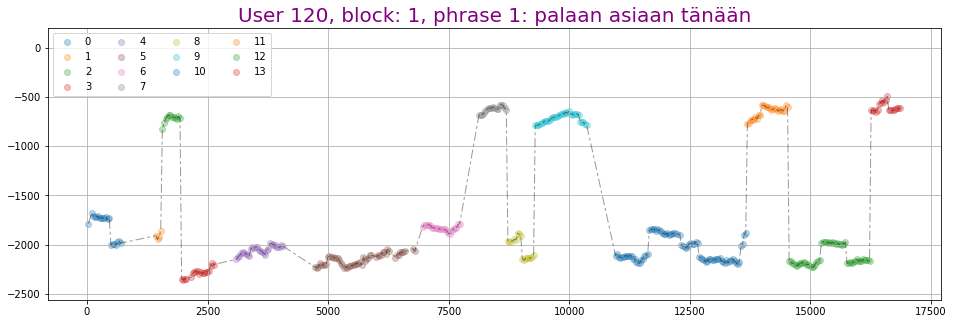

In [1209]:
#Getting unique labels
u_labels = np.unique(clusters.labels_)
#plotting the results:
fig = plt.figure(figsize=(16, 5))
plt.plot(sample['trialtime'], sample['y'], color="black", linestyle=(0,(9,3,3,3)), zorder=3, linewidth=1, alpha=0.4)
for i in u_labels:
    plt.scatter(sample.loc[sample['label']==i]['trialtime'] , sample.loc[sample['label']==i]['y'], label = i, 
               alpha=0.3)
plt.ylim(-2560, 200)
plt.legend(loc='upper left', ncol=4)
plt.title("User "+str(120)+", block: 1, phrase "+str(1)+": palaan asiaan tänään", color='purple', size=20)
    
plt.grid()
plt.show()

In [1210]:
groupeddf = sample.groupby(['label'], as_index=False).mean()
groupeddf

label     id  block  sentence_n     trialtime            x            y  \
0       0  120.0    1.0         1.0    378.333350   845.601899 -1818.115861   
1       1  120.0    1.0         1.0   1480.000000  1050.418102 -1908.337666   
2       2  120.0    1.0         1.0   1746.666667   245.208209  -720.803904   
3       3  120.0    1.0         1.0   2315.964895  1074.474541 -2284.164093   
4       4  120.0    1.0         1.0   3580.000000   661.794451 -2055.071050   
5       5  120.0    1.0         1.0   5657.160500   460.283715 -2147.959745   
6       6  120.0    1.0         1.0   7346.666667   740.209027 -1830.646455   
7       7  120.0    1.0         1.0   8413.333333   513.040856  -626.189653   
8       8  120.0    1.0         1.0   9007.083313   765.941737 -2035.468643   
9       9  120.0    1.0         1.0   9830.000000   690.726264  -717.933769   
10     10  120.0    1.0         1.0  12313.950617   825.316601 -2052.400387   
11     11  120.0    1.0         1.0  14113.333346  1005.876251  -652.681114   
12     12  120.0    1.0         1.0  15396.666667   891.258900 -2119.614859   
13     13  120.0    1.0         1.0  16563.333316   867.651619  -602.480527   

    slen  smoothy  
0   20.0  -1750.0  
1   20.0  -1750.0  
2   20.0   -750.0  
3   20.0  -1750.0  
4   20.0  -1750.0  
5   20.0  -1750.0  
6   20.0  -1750.0  
7   20.0   -750.0  
8   20.0  -1750.0  
9   20.0   -750.0  
10  20.0  -1750.0  
11  20.0   -750.0  
12  20.0  -1750.0  
13  20.0   -750.0

[0 0 1 0 0 0 0 1 0 1 0 1 0 1]


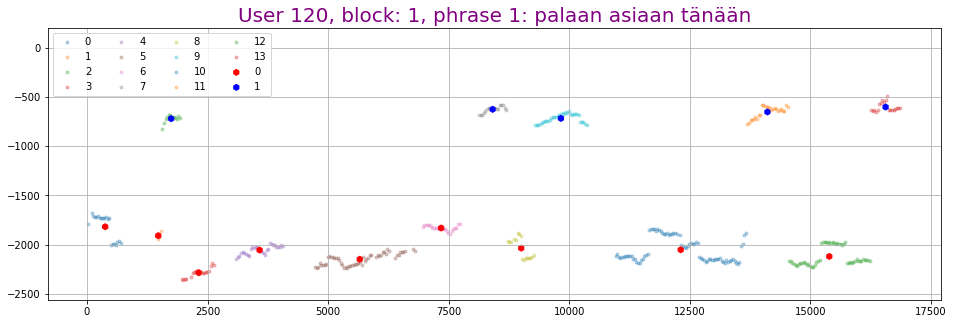

In [1211]:
#now do a k-means on the grouped data
X=groupeddf[['y']]
kclusters = KMeans(n_clusters= 2).fit_predict(X)

#print(X)

print(kclusters)

#print(kmeans)
groupeddf['klabel'] = kclusters

#Getting unique labels
u_labels2 = np.unique(kclusters)
 
#plotting the results:

fig = plt.figure(figsize=(16, 5))


for i in u_labels:
    plt.scatter(sample.loc[sample['label']==i]['trialtime'] , sample.loc[sample['label']==i]['y'], label = i, 
               alpha=0.3, marker='.')

for i in u_labels2:
    plt.scatter(groupeddf.loc[groupeddf['klabel']==i]['trialtime'] , groupeddf.loc[groupeddf['klabel']==i]['y'], label = i, 
               alpha=1, marker='h', c=groupeddf.loc[groupeddf['klabel']==i]['klabel'].map({0:'red',1:'blue'}))
    
plt.ylim(-2560, 200)
plt.title("User "+str(120)+", block: 1, phrase "+str(1)+": palaan asiaan tänään", color='purple', size=20)
plt.legend(loc='upper left', ncol=4)
plt.grid()
plt.show()


In [1212]:
#now determine which label is upper and lower
m0 = groupeddf.loc[groupeddf.klabel==0]['y'].mean()
m1 = groupeddf.loc[groupeddf.klabel==1]['y'].mean()

if m0 > m1:
    groupeddf['label2']=groupeddf['klabel'].map({0: 'U', 1: 'D'})
else:
    if m0<m1:
        groupeddf['label2']=groupeddf['klabel'].map({0: 'D', 1: 'U'})
    else:
        print("equal means")

groupeddf.loc[groupeddf.label2=='U']

label     id  block  sentence_n     trialtime            x           y  \
2       2  120.0    1.0         1.0   1746.666667   245.208209 -720.803904   
7       7  120.0    1.0         1.0   8413.333333   513.040856 -626.189653   
9       9  120.0    1.0         1.0   9830.000000   690.726264 -717.933769   
11     11  120.0    1.0         1.0  14113.333346  1005.876251 -652.681114   
13     13  120.0    1.0         1.0  16563.333316   867.651619 -602.480527   

    slen  smoothy  klabel label2  
2   20.0   -750.0       1      U  
7   20.0   -750.0       1      U  
9   20.0   -750.0       1      U  
11  20.0   -750.0       1      U  
13  20.0   -750.0       1      U

In [1216]:
#remap sample with u, d labels
mapping=dict(groupeddf[['label', 'label2']].values)
sample['udlabel'] = sample.label.map(mapping)
sample

/var/folders/cq/dpv74_vx6z763s2ht4_54zx1tyht7_/T/ipykernel_36302/3597003587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['udlabel'] = sample.label.map(mapping)


id  block  sentence_n  trialtime            x            y  \
121580  120      1           1     30.000  1172.488712 -1787.223284   
121581  120      1           1     96.667  1315.887080 -1678.096792   
121582  120      1           1    130.000  1305.794508 -1710.433140   
121583  120      1           1    163.333  1290.317904 -1722.877956   
121584  120      1           1    196.667  1298.800740 -1716.131276   
...     ...    ...         ...        ...          ...          ...   
121982  120      1           1  16730.000   656.570812  -634.247684   
121983  120      1           1  16763.333   659.022736  -623.334008   
121984  120      1           1  16796.667   656.757412  -614.917268   
121985  120      1           1  16830.000   654.047980  -616.891140   
121986  120      1           1  16863.333   668.595316  -616.741348   

                    sentence  slen  smoothy  label udlabel  
121580  palaan asiaan tänään    20    -1750      0       D  
121581  palaan asiaan tänään    20    -1750      0       D  
121582  palaan asiaan tänään    20    -1750      0       D  
121583  palaan asiaan tänään    20    -1750      0       D  
121584  palaan asiaan tänään    20    -1750      0       D  
...                      ...   ...      ...    ...     ...  
121982  palaan asiaan tänään    20     -750     13       U  
121983  palaan asiaan tänään    20     -750     13       U  
121984  palaan asiaan tänään    20     -750     13       U  
121985  palaan asiaan tänään    20     -750     13       U  
121986  palaan asiaan tänään    20     -750     13       U  

[407 rows x 11 columns]

In [1214]:
len(sample)

407

In [1167]:
user_gaze.groupby(['id','sentence_n']).mean()

block    trialtime           x            y  slen      smoothy
id  sentence_n                                                                
101 2             1.0  4412.851855  579.927701 -1636.611566  22.0 -1510.683761
    5             1.0  4014.404036  481.079755 -1508.235735  21.0 -1422.727273
    8             1.0  4212.070919  644.287011 -1550.589035  22.0 -1456.382979
    9             1.0  4363.673757  613.441253 -1497.053495  17.0 -1481.914894
    11            1.0  5343.424244  624.559046 -1422.425277  22.0 -1350.000000
...               ...          ...         ...          ...   ...          ...
133 55            1.0  6216.650210  634.176094 -1403.978370  22.0 -1459.876543
    56            1.0  3407.143794  817.614558 -1546.238899  20.0 -1387.254902
    57            1.0  3705.454545  691.636113 -1494.562156  18.0 -1472.727273
    58            1.0  5989.506964  656.921741 -1402.483713  21.0 -1368.384401
    63            1.0  3699.393941  523.627710 -1928.917003  18.0 -1613.636364

[540 rows x 6 columns]

In [1232]:
#put it all together

import traceback


cldata = []
user_arr = []
sent_arr = []
pct_up_gazes = []
#users - sentence - n

fl = dfjoined.loc[dfjoined.block==1]

for idx, row in fl.iterrows():
    try:
        #step 1, run DBSCAN
        sample = user_gaze.loc[(user_gaze.id==row.id)&(user_gaze.sentence_n==row.sentence_n)].copy()
        if len(sample)==0:
            continue
        X = sample[['trialtime','y']]
        clusters = DBSCAN(min_samples = 2, #number of samples for a point to be considered core
                          eps = 300, #The maximum distance between two samples for one to be considered as in the neighborhood 
                          n_jobs=5
                         ).fit(X)
        sample['label'] = clusters.labels_
        #step 2, group the clusters
        groupeddf = sample.groupby(['label'], as_index=False).mean()
        #step3, now do a k-means on the grouped data
        if len(groupeddf)>1:
            X=groupeddf[['y']]
            clusters = KMeans(n_clusters= 2).fit_predict(X)
            groupeddf['klabel'] = clusters
            #step4, determine upper/lower clusters
            m0 = groupeddf.loc[groupeddf.klabel==0]['y'].mean()
            m1 = groupeddf.loc[groupeddf.klabel==1]['y'].mean()
            if m0 > m1:
                groupeddf['label2']=groupeddf['klabel'].map({0: 'U', 1: 'D'})
            else:
                if m0<m1:
                    groupeddf['label2']=groupeddf['klabel'].map({0: 'D', 1: 'U'})
                else: #this should probably never happen
                    print("equal means")
            #step5, determine number of upshifts
            user_arr.append(row.id)
            sent_arr.append(row.sentence_n)
            cldata.append(len(groupeddf.loc[groupeddf.label2=='U']))
            
            #remap sample with u, d labels
            mapping=dict(groupeddf[['label', 'label2']].values)
            sample['udlabel'] = sample.label.map(mapping)
            pct_up_gazes.append(len(sample.loc[sample.udlabel=='D'])/len(sample))
            
        else:
            user_arr.append(row.id)
            sent_arr.append(row.sentence_n)
            cldata.append(0)
            pct_up_gazes.append(0)
    except Exception as e: 
        groupeddf.info()
        print(row.id, row.sentence_n)
        print(e)
        print(traceback.format_exc())
        break            

cluster_shifts= pd.DataFrame({'user':user_arr,'sentence':sent_arr,'shiftsCL':cldata, 'pctDwnCL':pct_up_gazes})
cluster_shifts

user  sentence  shiftsCL  pctDwnCL
0     120        66         5  0.801120
1     126        66        10  0.385768
2     107        66         6  0.795918
3     121        66         3  0.797170
4     118        66         4  0.382857
..    ...       ...       ...       ...
535   108        39         4  0.783251
536   121        31         7  0.678571
537   125        31         5  0.757282
538   110        31         6  0.557185
539   112        31         2  0.835821

[540 rows x 4 columns]

In [1169]:
cluster_shifts.loc[cluster_shifts.user==120]

user  sentence  shiftsCL
0     120        66         5
8     120        52         4
17    120         3         4
25    120        56         2
33    120        54         5
40    120        51         6
47    120        75         4
53    120         1         5
64    120        53         6
70    120        74         5
81    120        32         2
86    120        17         4
93    120        13         5
98    120        43         4
109   120        20         2
116   120        11         5
133   120        48         7
142   120        36         5
147   120        49         2

In [1170]:
print(cluster_shifts.shiftsCL.sum())


2719


In [1171]:
#threshold based gaze shift identification
#make the dyads

cols=['user', 'sentence', 'start_l', 'end_l', 'start_l_x','start_l_y', 'end_l_x', 'end_l_y', 'samelett', 
      'timediff','start_s', 'end_s', 'start_b', 'end_b', 
      'gaze_up_pct', 'gazedata', 'smgzdata', 'firstgazeup', 'label']



In [1172]:
dataset = []
events_after_last_lookup_counter = 1
events_after_word_start_counter = 1
for i in range(len(user_type)):
    if i==len(user_type)-1 or user_type.iloc[i]['sentence_n']!=user_type.iloc[i+1]['sentence_n']: #handle the last keystroke event for this sentence (there is no i+1)
        #continue
        data = []
        data.append(user_type.iloc[i]['id'])
        data.append(user_type.iloc[i]['sentence_n']) #sentence
        data.append(user_type.iloc[i]['event']) #startl
        data.append('E') #endl is End of Input
        data.append(user_type.iloc[i]['touchx']) #start_l_x
        data.append(user_type.iloc[i]['touchy']) #start_l_y
        data.append(np.NaN) #end_l_x
        data.append(np.NaN) #end_l_y
        data.append(np.NaN) #samelett
        data.append(np.NaN) #timediff
        if user_type.iloc[i]['event'] == " ": #start_s
            data.append(1)
        else:
            data.append(0)
        
        data.append(np.NaN) #end_s 
        
        if user_type.iloc[i]['event'] == "B": #start_b
            data.append(1)
        else:
            data.append(0)
        
        data.append(np.NaN) #end_b
        
        #gaze pct in upper area
        gazes_data = user_gaze.loc[(user_gaze['id'] == user_type.iloc[i]['id']) &\
                                   (user_gaze['sentence_n'] == user_type.iloc[i]['sentence_n']) &\
                                 ((user_gaze['trialtime'] >= user_type.iloc[i]['trialtime']))]

        gazes_up = gazes_data.loc[(gazes_data['y'] >= screen_midpoint)]

        if len(gazes_data)>0:
            gaze_up_pct = len(gazes_up)/len(gazes_data)
            data.append(gaze_up_pct)
        else:
            data.append(np.NaN)

        #gaze dataseries
        gazeseries = gazes_data['y'].tolist()
        data.append(gazeseries)
        #smooth gaze dataseries
        data.append(gazes_data['smoothy'].tolist())
        #when is the first gaze up
        if len(gazes_data)>0:
            firstgazeup = next((idx for idx, k in enumerate(gazeseries) if k >= screen_midpoint),-1)/len(gazeseries)
            data.append(firstgazeup)
        else:
            data.append(np.NaN)

        #is this a lookup event?
        if(firstgazeup>0):
            data.append(1)
            events_after_last_lookup_counter = 1
        else:
            events_after_last_lookup_counter = events_after_last_lookup_counter+1
            data.append(0)

        #events after lookup
        #data.append(events_after_lookup_counter)

        #events after last space

        #finish
        dataset.append(data)
    else:
        try:
            data = []
            data.append(user_type.iloc[i]['id'])
            data.append(user_type.iloc[i]['sentence_n']) #sentence
            data.append(user_type.iloc[i]['event']) #startl
            data.append(user_type.iloc[i+1]['event']) #endl
            data.append(user_type.iloc[i]['touchx']) #start_l_x
            data.append(user_type.iloc[i]['touchy']) #start_l_y
            data.append(user_type.iloc[i+1]['touchx']) #end_l_x
            data.append(user_type.iloc[i+1]['touchy']) #end_l_y
            if user_type.iloc[i]['event'] ==user_type.iloc[i+1]['event']: #samelett
                data.append(1)
            else:
                data.append(0)
            data.append(user_type.iloc[i+1]['trialtime'] - user_type.iloc[i]['trialtime']) #timediff
            if user_type.iloc[i]['event'] == " ": #start_s
                data.append(1)
            else:
                data.append(0)
            if user_type.iloc[i+1]['event'] == " ": #end_s 
                data.append(1)
            else:
                data.append(0)
            if user_type.iloc[i]['event'] == "B": #start_b
                data.append(1)
            else:
                data.append(0)
            if user_type.iloc[i+1]['event'] == "B": #end_b
                data.append(1)
            else:
                data.append(0)

            #gaze pct in upper area
            
            gazes_data = user_gaze.loc[(user_gaze['id'] == user_type.iloc[i]['id']) &\
                                       (user_gaze['sentence_n'] == user_type.iloc[i]['sentence_n']) &\
                                     ((user_gaze['trialtime'] >= user_type.iloc[i]['trialtime']) &\
                                     (user_gaze['trialtime'] <= user_type.iloc[i+1]['trialtime']))]
            
            gazes_up = gazes_data.loc[(gazes_data['y'] >= screen_midpoint)]
            
            if len(gazes_data)>0:
                gaze_up_pct = len(gazes_up)/len(gazes_data)
                data.append(gaze_up_pct)
            else:
                data.append(None)
            
            #gaze dataseries
            gazeseries = gazes_data['y'].tolist()
            data.append(gazeseries)
            #smooth gaze dataseries
            data.append(gazes_data['smoothy'].tolist())
            #when is the first gaze up
            if len(gazes_data)>0:
                firstgazeup = next((idx for idx, k in enumerate(gazeseries) if k >= screen_midpoint),-1)/len(gazeseries)
                data.append(firstgazeup)
            else:
                data.append(None)
            
            #is this a lookup event?
            if(firstgazeup>0):
                data.append(1)
                events_after_last_lookup_counter = 1
            else:
                events_after_last_lookup_counter = events_after_last_lookup_counter+1
                data.append(0)
            
            #events after lookup
            #data.append(events_after_lookup_counter)
            
            #events after last space
            
            #finish
            dataset.append(data)
        except Exception as e:
            
            print(i,\
                  user_type.iloc[i]['id'],\
                  user_type.iloc[i]['sentence_n'],\
                  user_type.iloc[i]['trialtime'],\
                  user_type.iloc[i+1]['trialtime'])
            print(e)
            break
            continue



In [1173]:
user_gaze

id  block  sentence_n  trialtime            x            y  \
0       133      1          14     32.000  1335.145444 -1959.137992   
1       133      1          14     65.333  1337.746648 -1960.109828   
2       133      1          14     98.667  1330.680728 -1959.243692   
3       133      1          14    132.000  1321.073316 -1958.664456   
4       133      1          14    165.333  1324.098724 -1966.622760   
...     ...    ...         ...        ...          ...          ...   
139174  126      1          59  14661.333  1086.043152  -638.089124   
139175  126      1          59  14694.667  1086.043152  -638.089124   
139176  126      1          59  14728.000  1086.043152  -638.089124   
139177  126      1          59  14794.667  1260.800272  -949.599104   
139178  126      1          59  14828.000  1260.800272  -949.599104   

                       sentence  slen  smoothy  
0       pääsen perille tunnissa    23    -1750  
1       pääsen perille tunnissa    23    -1750  
2       pääsen perille tunnissa    23    -1750  
3       pääsen perille tunnissa    23    -1750  
4       pääsen perille tunnissa    23    -1750  
...                         ...   ...      ...  
139174    en tiennyt mitä tehdä    21     -750  
139175    en tiennyt mitä tehdä    21     -750  
139176    en tiennyt mitä tehdä    21     -750  
139177    en tiennyt mitä tehdä    21    -1750  
139178    en tiennyt mitä tehdä    21    -1750  

[139179 rows x 9 columns]

In [1174]:
len(user_gaze.loc[(user_gaze['id'] == 120) &\
                  (user_gaze['sentence_n'] == 66) &\
               ((user_gaze['trialtime'] >= 0) &\
               (user_gaze['trialtime'] <= 458))]) #&\
               #(user_gaze['y'] >=-1000)]

#['y'].tolist()

13

In [1175]:
len(user_type)

13809

In [1176]:
f_empty = pd.DataFrame(dataset, columns=cols)
print(len(f_empty))
#f_empty.loc[(f_empty['gaze_up_pct']>0) & (f_empty['sentence']==66)]
f_empty.loc[(f_empty['user']==120) & (f_empty['sentence']==66)]

13809


user  sentence start_l end_l   start_l_x  start_l_y     end_l_x   end_l_y  \
0    120        66       m     i  1158.39840  -2213.750   987.18750 -1766.250   
1    120        66       i     t   987.18750  -1766.250   613.12500 -1821.250   
2    120        66       t     ä   613.12500  -1821.250  1378.47660 -1956.875   
3    120        66       ä        1378.47660  -1956.875   815.27344 -2451.250   
4    120        66             s   815.27344  -2451.250   235.89844 -2001.875   
5    120        66       s     i   235.89844  -2001.875  1007.22656 -1746.250   
6    120        66       i     n  1007.22656  -1746.250  1007.22656 -2228.750   
7    120        66       n     ä  1007.22656  -2228.750  1408.35940 -1993.125   
8    120        66       ä        1408.35940  -1993.125   803.32030 -2473.125   
9    120        66             l   803.32030  -2473.125  1132.38280 -1963.750   
10   120        66       l     u  1132.38280  -1963.750   861.32810 -1790.000   
11   120        66       u     u   861.32810  -1790.000   824.06250 -1788.125   
12   120        66       u     l   824.06250  -1788.125  1098.28120 -1961.250   
13   120        66       l     r  1098.28120  -1961.250   408.16406 -1783.750   
14   120        66       r     t   408.16406  -1783.750   571.99220 -1755.000   
15   120        66       t     B   571.99220  -1755.000  1322.57810 -2206.250   
16   120        66       B     B  1322.57810  -2206.250  1331.36720 -2235.000   
17   120        66       B     e  1331.36720  -2235.000   356.13280 -1798.750   
18   120        66       e     t   356.13280  -1798.750   554.06250 -1798.125   
19   120        66       t     E   554.06250  -1798.125         NaN       NaN   

    samelett  timediff  start_s  end_s  start_b  end_b  gaze_up_pct  \
0        0.0     458.0        0    0.0        0    0.0     0.000000   
1        0.0     626.0        0    0.0        0    0.0     0.000000   
2        0.0     610.0        0    0.0        0    0.0     0.000000   
3        0.0     719.0        0    1.0        0    0.0     0.000000   
4        0.0     589.0        1    0.0        0    0.0     0.000000   
5        0.0     978.0        0    0.0        0    0.0     0.535714   
6        0.0     427.0        0    0.0        0    0.0     0.000000   
7        0.0     332.0        0    0.0        0    0.0     0.000000   
8        0.0     441.0        0    1.0        0    0.0     0.000000   
9        0.0     807.0        1    0.0        0    0.0     0.416667   
10       0.0     448.0        0    0.0        0    0.0     0.000000   
11       1.0     166.0        0    0.0        0    0.0     0.000000   
12       0.0     520.0        0    0.0        0    0.0     0.000000   
13       0.0     741.0        0    0.0        0    0.0     0.000000   
14       0.0     352.0        0    0.0        0    0.0     0.000000   
15       0.0     888.0        0    0.0        0    1.0     0.592593   
16       1.0     139.0        0    0.0        1    1.0     0.250000   
17       0.0     880.0        0    0.0        1    0.0     0.576923   
18       0.0     530.0        0    0.0        0    0.0     0.000000   
19       NaN       NaN        0    NaN        0    NaN     0.350000   

                                             gazedata  \
0   [-2256.48538, -2257.132868, -2224.789272, -223...   
1   [-1911.791036, -1905.124084, -1907.398144, -19...   
2   [-1970.499232, -1954.374244, -1975.25392, -195...   
3   [-2071.84862, -2055.256136, -2051.610996, -200...   
4   [-2441.998544, -2405.953636, -2414.241724, -22...   
5   [-2152.053176, -2161.458664, -2138.829804, -21...   
6   [-1970.599496, -1963.712084, -1950.960436, -19...   
7   [-2251.803172, -2243.202816, -2236.012196, -22...   
8   [-2057.834008, -2050.198844, -2019.142372, -20...   
9   [-2058.846916, -2038.63466, -2028.032044, -198...   
10  [-1915.06834, -1919.6376, -1847.889648, -1824....   
11  [-1861.5328, -1864.772656, -1872.541908, -1870...   
12  [-1896.402324, -1860.731292, -1851.40976, -186...   
13  [-1876.5

In [1177]:
#which sentences contain error correcting events
sent_n=-1
sentences = {}
sentences_shifts = {}
keystrokes={}
for idx, row in f_empty.iterrows():
    trial_id = str(row['user'])+"_"+str(row['sentence'])
    keystrokes[trial_id]=keystrokes.get(trial_id, 1)+1
    if row['label']==1:
        sentences_shifts[trial_id]=sentences_shifts.get(trial_id, 0)+1
    else:
        sentences_shifts[trial_id]=sentences_shifts.get(trial_id, 0)
    if row['start_l']=='B':
        if row['end_l']=='B': #ignore consecutive bsps
            continue
        else:
            sentences[trial_id]=sentences.get(trial_id, 0)+1
    else:
        sentences[trial_id]=sentences.get(trial_id, 0)
    
        
sent_errs = pd.DataFrame.from_dict(sentences, orient='index', columns=['errors'])
sent_errs['bla']=sent_errs.index#.split('_')[0]
sent_errs['user']=sent_errs.apply(lambda row: row.bla.split('_')[0], axis=1)
sent_errs['sent_n']=sent_errs.apply(lambda row: row.bla.split('_')[1], axis=1)


#sent_errs.head(10)
#print(len(sent_errs))

sent_err_shifts = pd.DataFrame.from_dict(sentences_shifts, orient='index', columns=['shifts'])
sent_err_shifts['bla']=sent_err_shifts.index#.split('_')[0]
sent_err_shifts['user']=sent_err_shifts.apply(lambda row: row.bla.split('_')[0], axis=1)
sent_err_shifts['sent_n']=sent_err_shifts.apply(lambda row: row.bla.split('_')[1], axis=1)

keystrokess = pd.DataFrame.from_dict(keystrokes, orient='index', columns=['keystrokes'])
keystrokess['bla']=sent_err_shifts.index#.split('_')[0]
keystrokess['user']=sent_err_shifts.apply(lambda row: row.bla.split('_')[0], axis=1)
keystrokess['sent_n']=sent_err_shifts.apply(lambda row: row.bla.split('_')[1], axis=1)

#sent_errs.head(10)
#print(len(sent_err_shifts))

sent_errs_final = pd.merge(sent_errs, sent_err_shifts, 
                    left_on=['user', 'sent_n'], 
                    right_on=['user', 'sent_n'], 
                    how='inner')
sent_errs_final = pd.merge(sent_errs_final, keystrokess, 
                    left_on=['user', 'sent_n'], 
                    right_on=['user', 'sent_n'], 
                    how='inner')
sent_errs_final=sent_errs_final[['user', 'sent_n','errors','shifts', 'keystrokes']]
#sent_errs_final.loc[(sent_errs_final['user']==120)]
sent_errs_final


user sent_n  errors  shifts  keystrokes
0    120     66       1       5          21
1    120     52       0       3          23
2    120      3       1       3          24
3    120     56       0       2          21
4    120     54       2       4          35
..   ...    ...     ...     ...         ...
536  111     45       2       6          52
537  111     47       4       9          34
538  111     28       1       5          23
539  111     67       1       7          23
540  111     63       1       3          41

[541 rows x 5 columns]

In [1178]:
sent_errs_final

user sent_n  errors  shifts  keystrokes
0    120     66       1       5          21
1    120     52       0       3          23
2    120      3       1       3          24
3    120     56       0       2          21
4    120     54       2       4          35
..   ...    ...     ...     ...         ...
536  111     45       2       6          52
537  111     47       4       9          34
538  111     28       1       5          23
539  111     67       1       7          23
540  111     63       1       3          41

[541 rows x 5 columns]

In [1233]:
#calculate simple keyboard-text area ratios based on threshold

pct_up_gazes_t = []
#users - sentence - n

fl = dfjoined.loc[dfjoined.block==1]

for idx, row in fl.iterrows():
    try:
        sample = user_gaze.loc[(user_gaze.id==row.id)&(user_gaze.sentence_n==row.sentence_n)]
        if len(sample)>0:
            pct_up_gazes_t.append(len(sample.loc[sample.y<screen_midpoint])/len(sample))
        else:
            pct_up_gazes_t.append(0)
            
    except Exception as e:

        print(row.id, row.sentence_n)
        print(e)
        break
        
len(pct_up_gazes_t)
sent_errs_final['pctDwnT'] = pct_up_gazes_t

Sentence  66


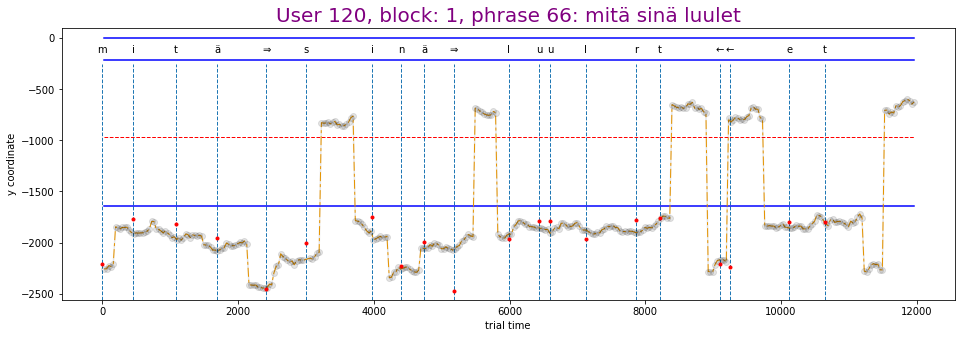

Sentence  52


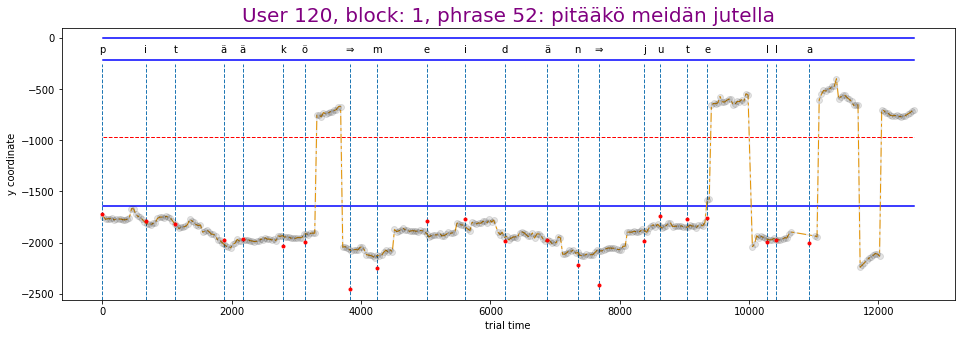

Sentence  3


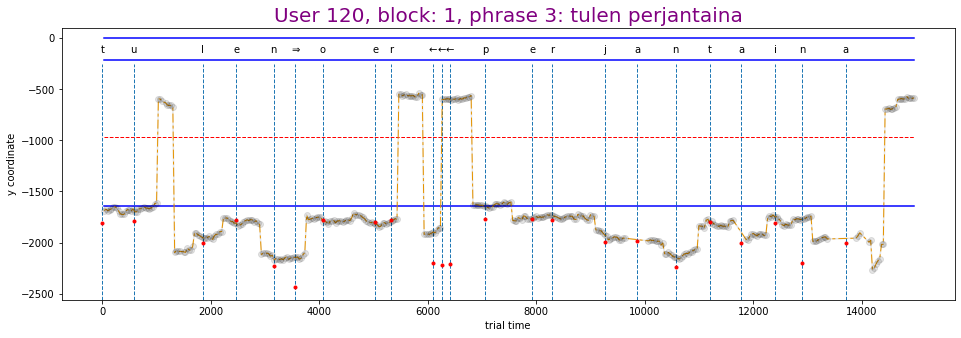

Sentence  56


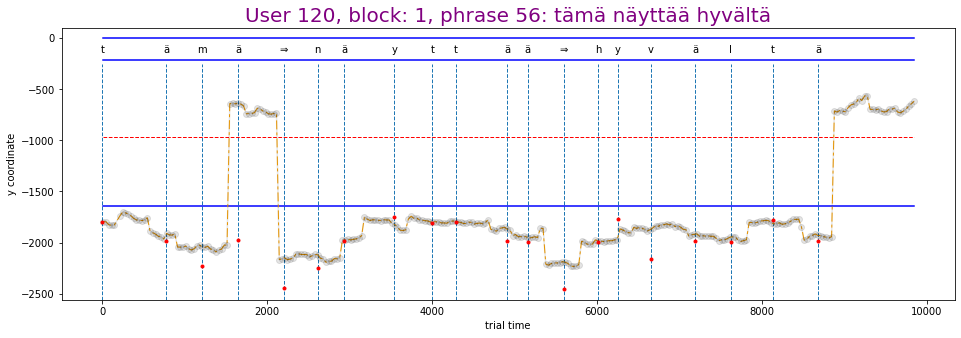

Sentence  54


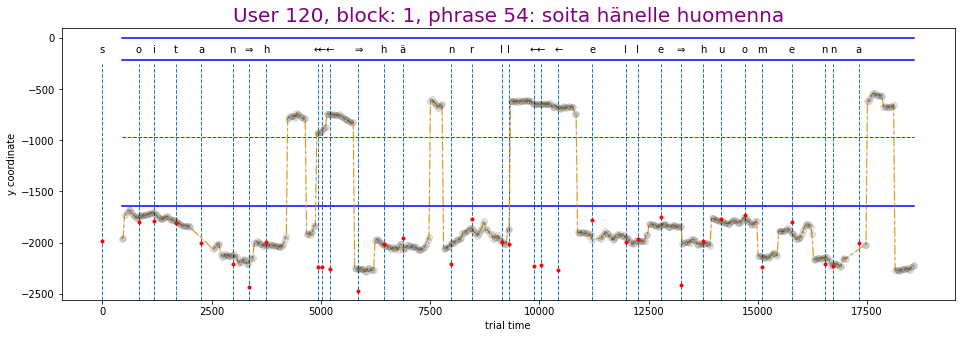

Sentence  51


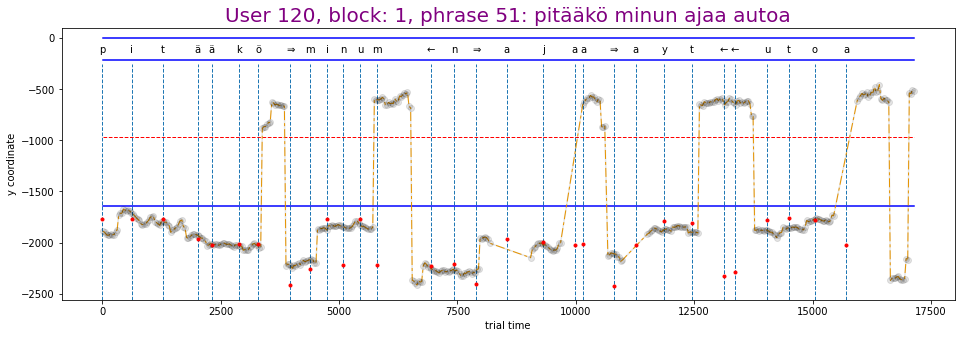

Sentence  75


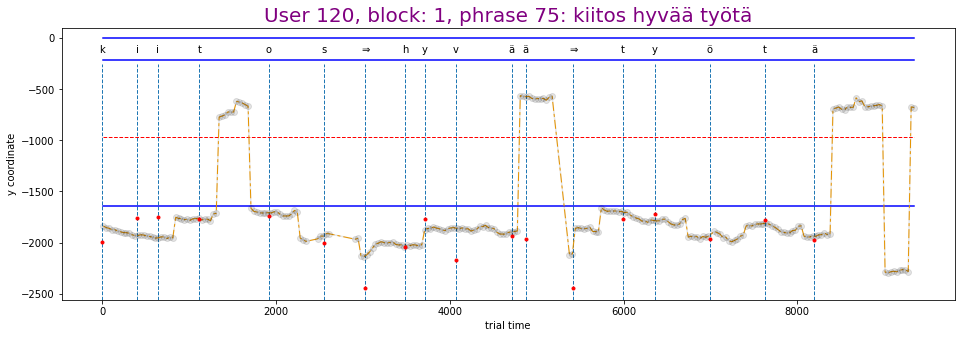

Sentence  1


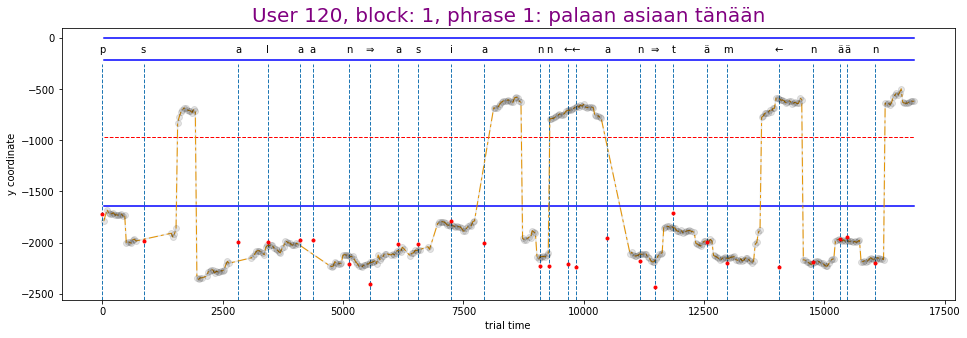

Sentence  53


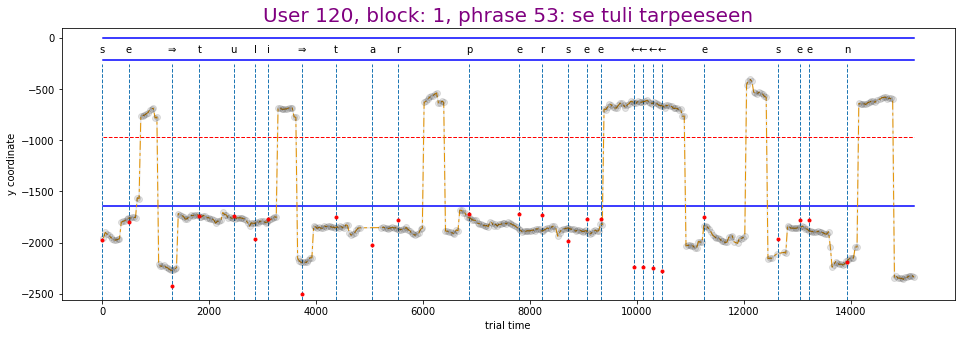

Sentence  74


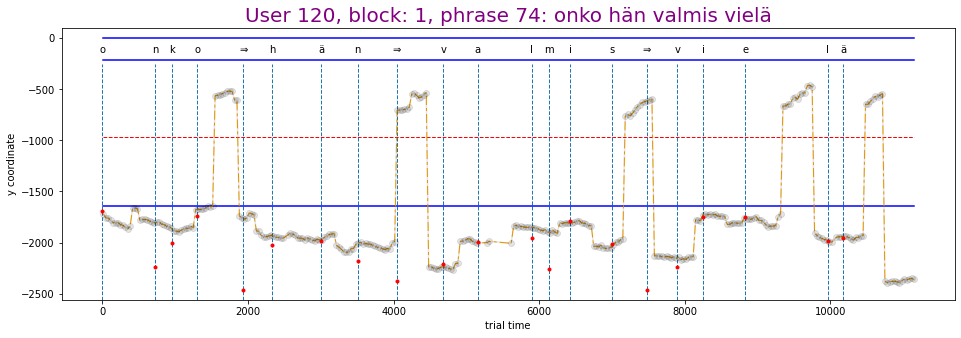

Sentence  32


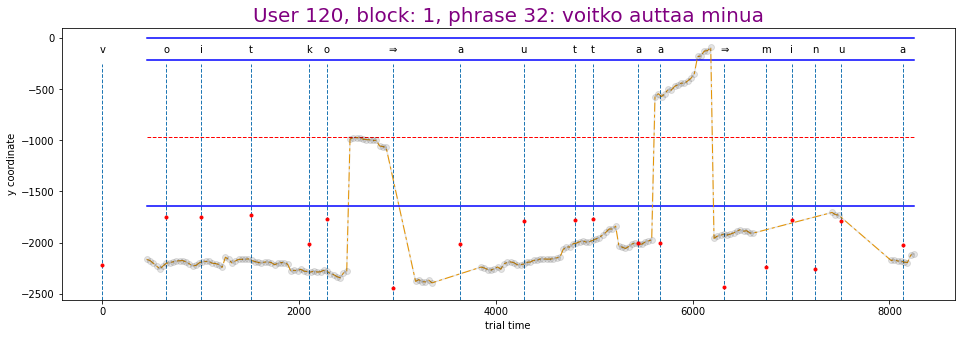

Sentence  17


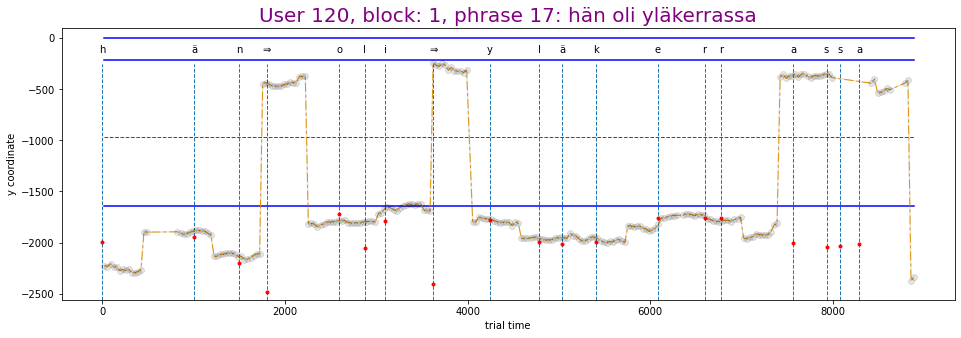

Sentence  13


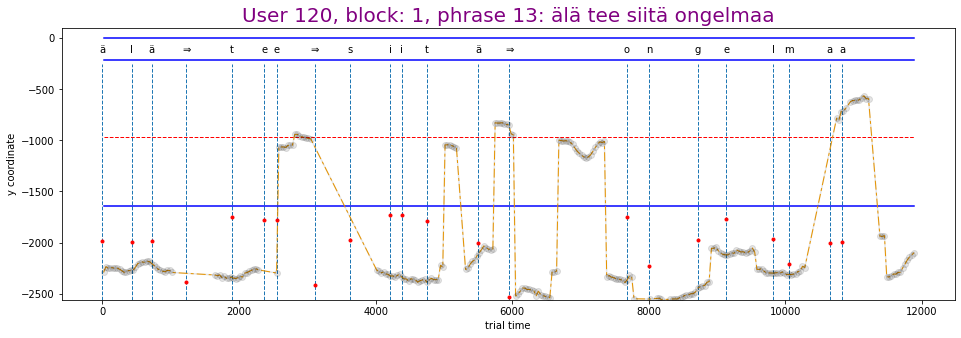

Sentence  43


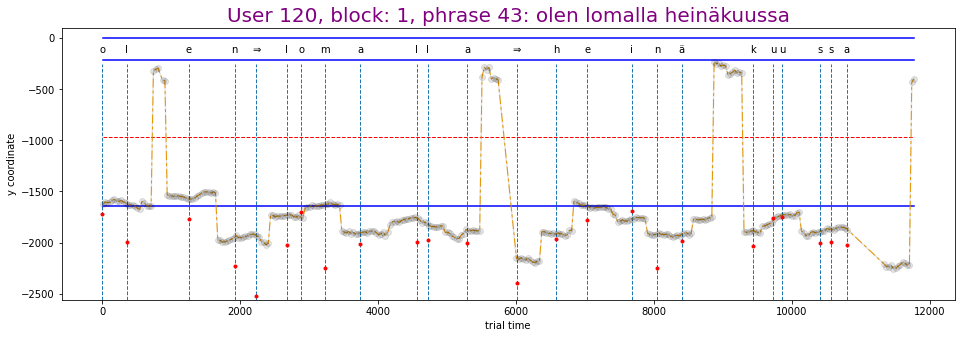

Sentence  20


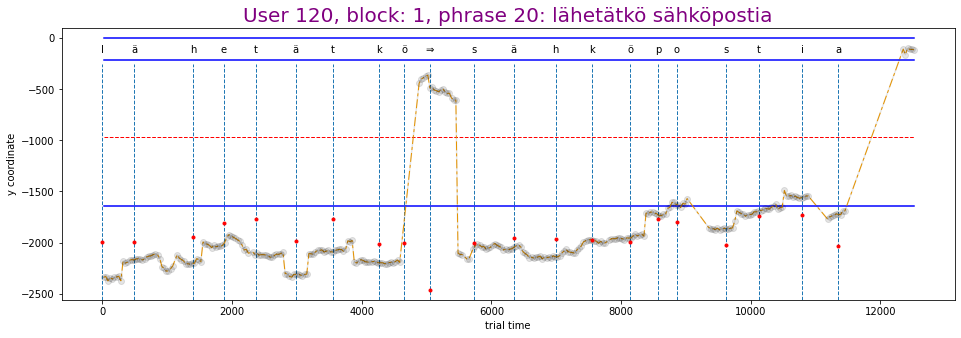

Sentence  11


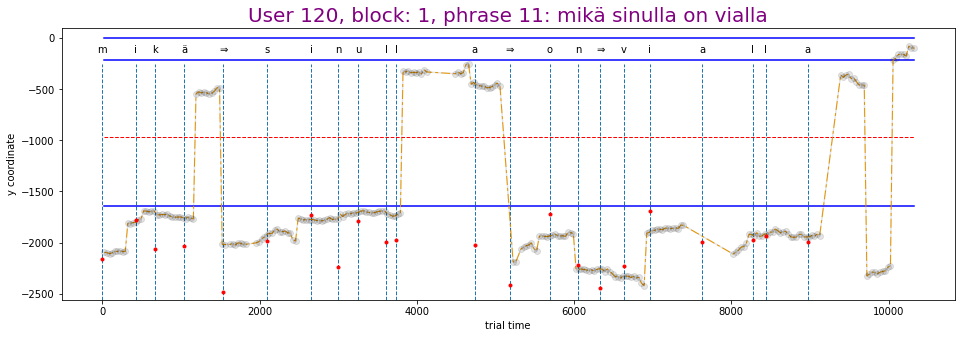

Sentence  48


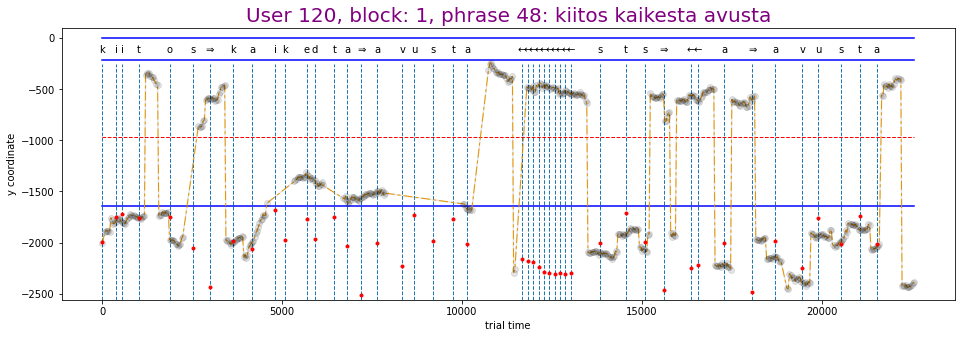

Sentence  36


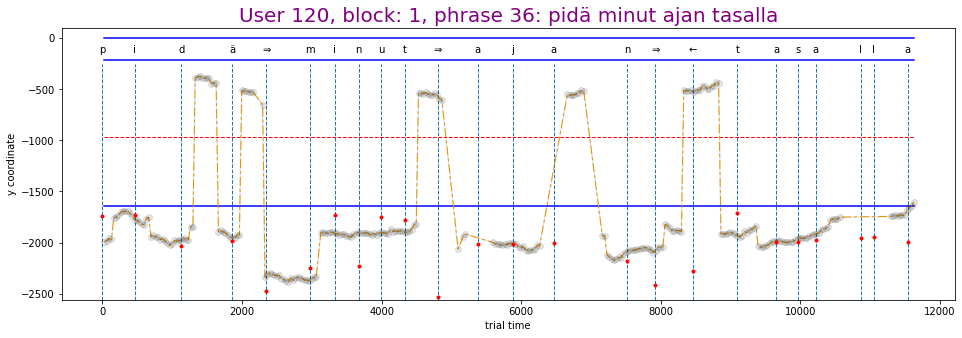

Sentence  49


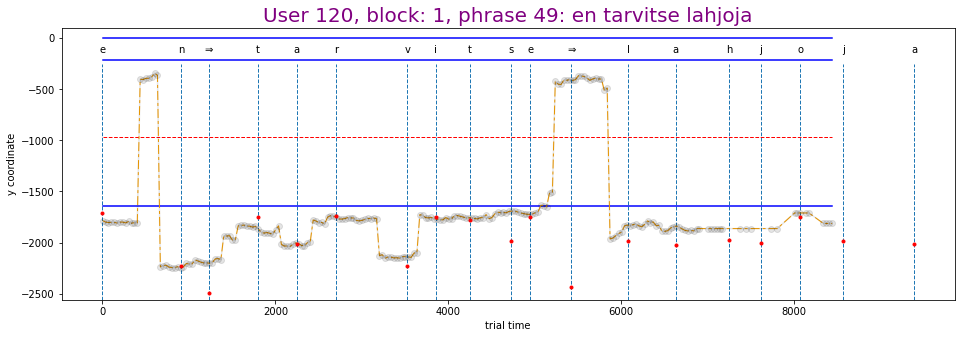

In [1179]:
u120 = dfjoined.loc[(dfjoined['id']==120) & (dfjoined['block']==1)]['sentence_n'].tolist()
for i in range(len(u120)):
    print("Sentence ", ss[i])
    plotusersentence(user_gaze, user_type, dfsent, 120, u120[i])

In [1180]:
f_empty.loc[(f_empty.user==120) & (f_empty.sentence==66) & (f_empty.label==1)]

user  sentence start_l end_l   start_l_x  start_l_y     end_l_x  end_l_y  \
5    120        66       s     i   235.89844  -2001.875  1007.22656 -1746.25   
9    120        66             l   803.32030  -2473.125  1132.38280 -1963.75   
15   120        66       t     B   571.99220  -1755.000  1322.57810 -2206.25   
16   120        66       B     B  1322.57810  -2206.250  1331.36720 -2235.00   
19   120        66       t     E   554.06250  -1798.125         NaN      NaN   

    samelett  timediff  start_s  end_s  start_b  end_b  gaze_up_pct  \
5        0.0     978.0        0    0.0        0    0.0     0.535714   
9        0.0     807.0        1    0.0        0    0.0     0.416667   
15       0.0     888.0        0    0.0        0    1.0     0.592593   
16       1.0     139.0        0    0.0        1    1.0     0.250000   
19       NaN       NaN        0    NaN        0    NaN     0.350000   

                                             gazedata  \
5   [-2152.053176, -2161.458664, -2138.829804, -21...   
9   [-2058.846916, -2038.63466, -2028.032044, -198...   
15  [-1760.891904, -1740.734612, -1742.559296, -17...   
16  [-2166.726148, -2169.991976, -2192.20649200000...   
19  [-1817.746424, -1833.44982, -1777.634784, -177...   

                                             smgzdata  firstgazeup  label  
5   [-1750, -1750, -1750, -1750, -1750, -750, -750...     0.178571      1  
9   [-1750, -1750, -1750, -1750, -1750, -1750, -17...     0.375000      1  
15  [-1750, -1750, -1750, -1750, -1750, -750, -750...     0.185185      1  
16                        [-1750, -1750, -1750, -750]     0.750000      1  
19  [-1750, -1750, -1750, -1750, -1750, -1750, -17...     0.650000      1

In [1234]:
sent_errs_final.info()
cluster_shifts.info()
sent_errs_final['user']=sent_errs_final['user'].astype(str).astype(int)
sent_errs_final['sent_n']=sent_errs_final['sent_n'].astype(str).astype(int)
sent_errs_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user        541 non-null    int64  
 1   sent_n      541 non-null    int64  
 2   errors      541 non-null    int64  
 3   shifts      541 non-null    int64  
 4   keystrokes  541 non-null    int64  
 5   pctUpT      541 non-null    float64
 6   pctDwnT     541 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 50.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user      540 non-null    int64  
 1   sentence  540 non-null    int64  
 2   shiftsCL  540 non-null    int64  
 3   pctDwnCL  540 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 17.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (t

In [1236]:
sent_errs_final2 = pd.merge(sent_errs_final, cluster_shifts, \
                    left_on=['user', 'sent_n'], \
                    right_on=['user', 'sentence'], \
                    how='inner')
sent_errs_final2=sent_errs_final2[['user', 'sent_n','errors','shifts','keystrokes','shiftsCL','pctDwnT', 'pctDwnCL']]
sent_errs_final2

user  sent_n  errors  shifts  keystrokes  shiftsCL   pctDwnT  pctDwnCL
0     120      66       1       5          21         5  0.801120  0.801120
1     120      52       0       3          23         4  0.400749  0.821918
2     120       3       1       3          24         4  0.785714  0.863415
3     120      56       0       2          21         2  0.797170  0.837288
4     120      54       2       4          35         5  0.382857  0.779297
..    ...     ...     ...     ...         ...       ...       ...       ...
535   111      45       2       6          52         9  0.783251  0.696462
536   111      47       4       9          34        10  0.836310  0.786982
537   111      28       1       5          23         6  0.757282  0.742021
538   111      67       1       7          23        10  0.557185  0.811224
539   111      63       1       3          41         5  1.000000  0.742029

[540 rows x 8 columns]

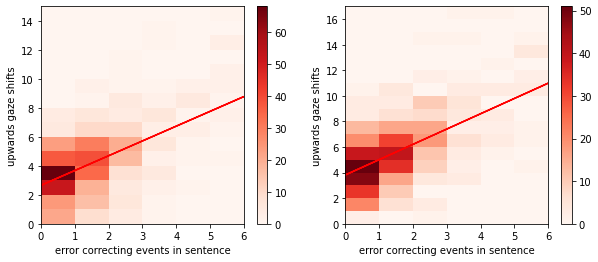

In [1247]:
#plt.scatter(sent_errs_final['errors'], sent_errs_final['shifts'], alpha=0.1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
h1=ax1.hist2d(sent_errs_final2['errors'], sent_errs_final2['shifts'], 
           bins=(sent_errs_final2['errors'].max(),sent_errs_final2['shifts'].max()), 
            cmap=plt.cm.Reds)
ax1.set_xlabel('error correcting events in sentence')
ax1.set_ylabel('upwards gaze shifts')
z = np.polyfit(sent_errs_final2['errors'], sent_errs_final2['shifts'], 1)
p = np.poly1d(z)
ax1.plot(sent_errs_final2['errors'],p(sent_errs_final2['errors']),"r-")


h2=ax2.hist2d(sent_errs_final2['errors'], sent_errs_final2['shiftsCL'], 
           bins=(sent_errs_final2['errors'].max(),sent_errs_final2['shiftsCL'].max()), 
            cmap=plt.cm.Reds)
ax2.set_xlabel('error correcting events in sentence')
ax2.set_ylabel('upwards gaze shifts')
z = np.polyfit(sent_errs_final2['errors'], sent_errs_final2['shiftsCL'], 1)
p = np.poly1d(z)
ax2.plot(sent_errs_final2['errors'],p(sent_errs_final2['errors']),"r-")

#ax.hist2d returns a tuple:
#The return value is (counts, xedges, yedges, Image).
#You only need the image for your colorbar:
#cb=fig.colorbar(cax[3])

fig.colorbar(h1[3], ax=ax1)
fig.colorbar(h2[3], ax=ax2)

plt.show()

In [1184]:
print(sent_errs_final.shifts.sum())
print(sent_errs_final.errors.sum())

1992
548


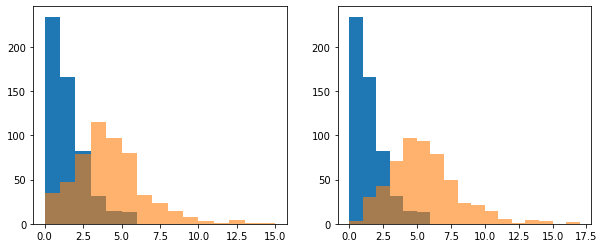

Spearmans correlation coefficient: 0.434
Samples are correlated (reject H0) p=0.000
Spearmans correlation coefficient: 0.510
Samples are correlated (reject H0) p=0.000


In [1185]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.hist(sent_errs_final2['errors'], bins=sent_errs_final2['errors'].max())
ax1.hist(sent_errs_final2['shifts'], bins=sent_errs_final2['shifts'].max(), alpha = 0.6)
ax2.hist(sent_errs_final2['errors'], bins=sent_errs_final2['errors'].max())
ax2.hist(sent_errs_final2['shiftsCL'], bins=sent_errs_final2['shiftsCL'].max(), alpha = 0.6)
plt.show()

from scipy.stats import spearmanr
coef, p = spearmanr(sent_errs_final2['errors'], sent_errs_final2['shifts'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)
    
coef, p = spearmanr(sent_errs_final2['errors'], sent_errs_final2['shiftsCL'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

In [1186]:
import scipy.stats as st

def conf_int(data,col):
    
    mean = data[col].mean()
    sd=data[col].std()
    ci= st.t.interval(0.95, 
                               len(data[col])-1, 
                               loc=np.mean(data[col]), 
                               scale=st.sem(data[col]))
    ci = mean-ci[0]
    return {"mean":mean, "sd":sd, "ci":ci}






In [1187]:
print(conf_int(sent_errs_final2.loc[sent_errs_final['errors']==0], 'shifts'))
print(conf_int(sent_errs_final2.loc[sent_errs_final['errors']>0], 'shifts'))

print(conf_int(sent_errs_final2.loc[sent_errs_final['errors']==0], 'shiftsCL'))
print(conf_int(sent_errs_final2.loc[sent_errs_final['errors']>0], 'shiftsCL'))

print(conf_int(sent_errs_final2, 'shifts'))
print(conf_int(sent_errs_final2, 'shiftsCL'))

{'mean': 3.0127659574468084, 'sd': 1.8662106839220673, 'ci': 0.2398428831833357}
{'mean': 4.2098360655737705, 'sd': 2.440455692323668, 'ci': 0.2749802822785252}
{'mean': 4.127659574468085, 'sd': 2.106329708492989, 'ci': 0.27070265676432603}
{'mean': 5.7344262295081965, 'sd': 2.635466929436197, 'ci': 0.2969533282130863}
{'mean': 3.688888888888889, 'sd': 2.2856060580437916, 'ci': 0.1932096832055703}
{'mean': 5.035185185185185, 'sd': 2.545442827176058, 'ci': 0.21517452691628947}


[0 1 2]


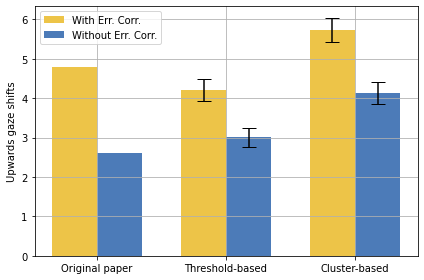

In [1245]:
#plot shifts by sentence type
labels=['Original paper', 'Threshold-based', 'Cluster-based']
x = np.arange(len(labels))  # the label locations
print(x)
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
boo = conf_int(sent_errs_final2.loc[sent_errs_final['errors']>0], 'shifts')
rects1 = ax.bar(x[1] - width/2, boo['mean'], yerr=boo['ci'], width=width, label='With Err. Corr.',capsize=7, color='#edc448')
boo = conf_int(sent_errs_final2.loc[sent_errs_final['errors']==0], 'shifts')
rects2 = ax.bar(x[1] + width/2, boo['mean'], yerr=boo['ci'], width= width, label='Without Err. Corr.',capsize=7, color='#4c7bb8')
ax.legend()

boo = conf_int(sent_errs_final2.loc[sent_errs_final['errors']>0], 'shiftsCL')
rects3 = ax.bar(x[2] - width/2, boo['mean'], yerr=boo['ci'], width=width, label='With Err. Corr.',capsize=7, color='#edc448')
boo = conf_int(sent_errs_final2.loc[sent_errs_final['errors']==0], 'shiftsCL')
rects4 = ax.bar(x[2] + width/2, boo['mean'], yerr=boo['ci'], width= width, label='Without Err. Corr.',capsize=7, color='#4c7bb8')

rects5 = ax.bar(x[0] - width/2, 4.8, width=width, label='With Err. Corr.', color='#edc448')
rects6 = ax.bar(x[0] + width/2, 2.6, width=width, label='Without Err. Corr.', color='#4c7bb8')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Upwards gaze shifts')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)


#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
plt.grid()

fig.tight_layout()

plt.show()


[0 1 2]


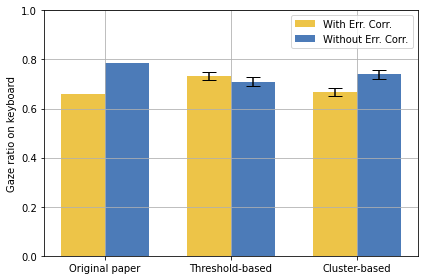

{'mean': 0.7096222410044597, 'sd': 0.1424664384344305, 'ci': 0.01830959475548788}
{'mean': 0.7327815646050326, 'sd': 0.13790137797142757, 'ci': 0.015538147224084753}
{'mean': 0.7402979463033088, 'sd': 0.1454639541839666, 'ci': 0.018694831441758097}
{'mean': 0.6668395099797338, 'sd': 0.155450439586514, 'ci': 0.017515501671378497}
{'mean': 0.7227029700751537, 'sd': 0.14024706409200233, 'ci': 0.011855538590459846}
{'mean': 0.6988075331946231, 'sd': 0.1553840971482636, 'ci': 0.013135121023827967}


In [1246]:
#plot shifts by sentence type
labels=['Original paper', 'Threshold-based', 'Cluster-based']
x = np.arange(len(labels))  # the label locations
print(x)
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.set_ylim(0,1)
plt.grid()
boo = conf_int(sent_errs_final2.loc[sent_errs_final['errors']>0], 'pctDwnT')
rects1 = ax.bar(x[1] - width/2, boo['mean'], yerr=boo['ci'], width=width, label='With Err. Corr.',capsize=7, color='#edc448')
boo = conf_int(sent_errs_final2.loc[sent_errs_final['errors']==0], 'pctDwnT')
rects2 = ax.bar(x[1] + width/2, boo['mean'], yerr=boo['ci'], width= width, label='Without Err. Corr.',capsize=7, color='#4c7bb8')
ax.legend()

boo = conf_int(sent_errs_final2.loc[sent_errs_final['errors']>0], 'pctDwnCL')
rects3 = ax.bar(x[2] - width/2, boo['mean'], yerr=boo['ci'], width=width, label='With Err. Corr.',capsize=7, color='#edc448')
boo = conf_int(sent_errs_final2.loc[sent_errs_final['errors']==0], 'pctDwnCL')
rects4 = ax.bar(x[2] + width/2, boo['mean'], yerr=boo['ci'], width= width, label='Without Err. Corr.',capsize=7, color='#4c7bb8')

rects5 = ax.bar(x[0] - width/2, 0.6594, width=width, label='With Err. Corr.', color='#edc448')
rects6 = ax.bar(x[0] + width/2, 0.7860, width=width, label='Without Err. Corr.', color='#4c7bb8')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gaze ratio on keyboard')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)


#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

print(conf_int(sent_errs_final2.loc[sent_errs_final['errors']==0], 'pctDwnT'))
print(conf_int(sent_errs_final2.loc[sent_errs_final['errors']>0], 'pctDwnT'))

print(conf_int(sent_errs_final2.loc[sent_errs_final['errors']==0], 'pctDwnCL'))
print(conf_int(sent_errs_final2.loc[sent_errs_final['errors']>0], 'pctDwnCL'))

print(conf_int(sent_errs_final2, 'pctDwnT'))
print(conf_int(sent_errs_final2, 'pctDwnCL'))


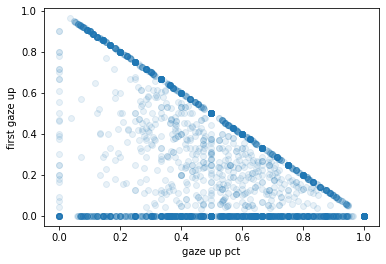

In [714]:
plt.scatter(x=f_empty.loc[(f_empty['firstgazeup']>=0)]['gaze_up_pct'], y=f_empty.loc[(f_empty['firstgazeup']>=0)]['firstgazeup'], alpha=0.1)
plt.xlabel('gaze up pct')
plt.ylabel('first gaze up')
plt.show()

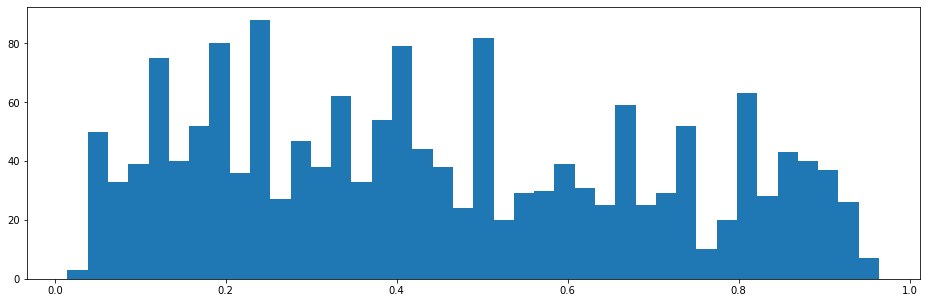

In [715]:
fig = plt.figure(figsize=(16, 5))
plt.hist(f_empty.loc[(f_empty['firstgazeup']>0)]['firstgazeup'], bins=40)
plt.show()

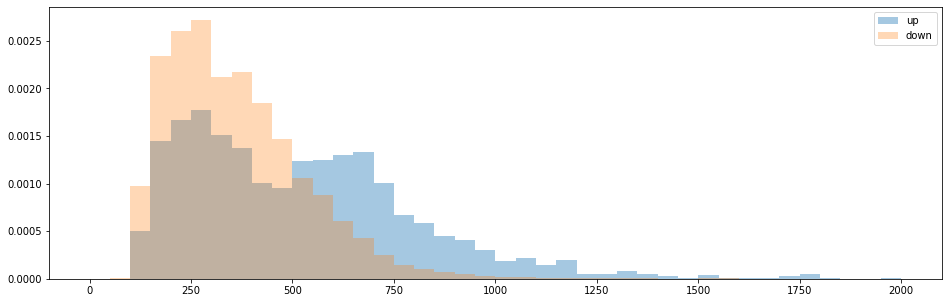

In [716]:
fig = plt.figure(figsize=(16, 5))
plt.hist(f_empty.loc[(f_empty['firstgazeup']>0)]['timediff'], bins=40, range=(0,2000), density=True, alpha=0.4, label='up')
plt.hist(f_empty.loc[(f_empty['firstgazeup']<=0)]['timediff'], bins=40, range=(0,2000), density=True, alpha=0.3, label='down')
plt.legend(loc='upper right')
plt.show()

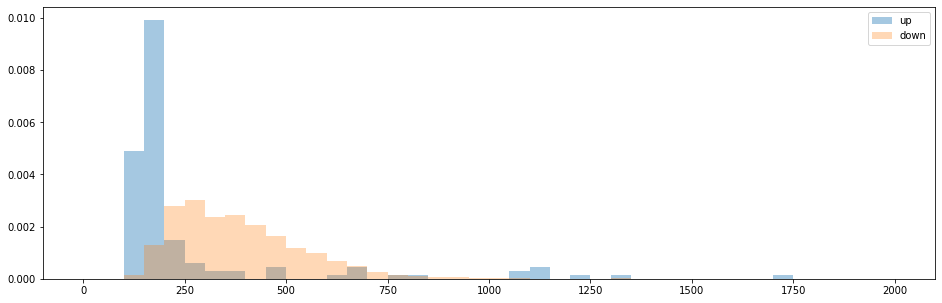

In [717]:
fig = plt.figure(figsize=(16, 5))
plt.hist(f_empty.loc[(f_empty['firstgazeup']>0)&(f_empty['samelett']>0)]['timediff'], bins=40, range=(0,2000), density=True, alpha=0.4, label='up')
plt.hist(f_empty.loc[(f_empty['firstgazeup']<=0)&(f_empty['samelett']==0)]['timediff'], bins=40, range=(0,2000), density=True, alpha=0.3, label='down')
plt.legend(loc='upper right')
plt.show()

In [37]:
f_empty.tail()

user  sentence start_l end_l  start_l_x  start_l_y      end_l_x  \
12786   111        63       B     B  1230.4688  -2178.750  1255.429700   
12787   111        63       B     B  1255.4297  -2191.875  1258.242200   
12788   111        63       B     B  1264.2188  -2203.125  1247.343800   
12789   111        63       B     v  1247.3438  -2191.250   688.007800   
12790   111        63       v     a   688.0078  -2273.750    60.820312   

        end_l_y  samelett  timediff  start_s  end_s  start_b  end_b  \
12786 -2191.875         1       154        0      0        1      1   
12787 -2203.750         1       142        0      0        1      1   
12788 -2191.250         1       478        0      0        1      1   
12789 -2273.750         0       999        0      0        1      0   
12790 -1998.750         0       427        0      0        0      0   

       gaze_up_pct                                           gazedata  \
12786     0.000000  [-2361.247368, -2361.247368, -2361.247368, -23...   
12787     0.000000                       [-2361.247368, -2361.247368]   
12788     1.000000  [-426.4807440000002, -426.4807440000002, -426....   
12789     0.666667  [-376.5202800000002, -376.5202800000002, -376....   
12790     0.000000                       [-2520.565656, -2507.647304]   

                                                smgzdata  firstgazeup  label  
12786                       [-1750, -1750, -1750, -1750]        -0.25      0  
12787                                     [-1750, -1750]        -0.50      0  
12788                     [-750, -750, -750, -750, -750]         0.00      0  
12789  [-750, -750, -750, -750, -750, -750, -1750, -1...         0.00      0  
12790                                     [-1750, -1750]        -0.50      0

In [621]:
f_empty['prev_timediff'] = f_empty['timediff'].shift(1)
f_empty['prev_samelett'] = f_empty['samelett'].shift(1)
f_empty['prev_start_s'] = f_empty['start_s'].shift(1)
f_empty['prev_end_s'] = f_empty['end_s'].shift(1)
f_empty['prev_start_b'] = f_empty['start_b'].shift(1)
f_empty['prev_end_b'] = f_empty['end_b'].shift(1)
f_empty['prev_gaze_up_pct'] = f_empty['gaze_up_pct'].shift(1)
f_empty['prev_firstgazeup'] = f_empty['firstgazeup'].shift(1)
f_empty['prev_start_l_x'] = f_empty['start_l_x'].shift(1)
f_empty['prev_start_l_y'] = f_empty['start_l_y'].shift(1)

prev_s = -1
for idx, row in f_empty.iterrows():
    if row['sentence'] != prev_s:
        #print ('prev = ', prev_s, ' now at ', row['sentence'])
        f_empty['prev_timediff'][idx] = np.NaN
        f_empty['prev_samelett'][idx] = np.NaN
        f_empty['prev_start_s'][idx] = np.NaN
        f_empty['prev_end_s'][idx] = np.NaN
        f_empty['prev_start_b'][idx] = np.NaN
        f_empty['prev_end_b'][idx] = np.NaN
        f_empty['prev_gaze_up_pct'][idx] = np.NaN
        f_empty['prev_firstgazeup'][idx] = np.NaN
        f_empty['prev_start_l_x'][idx] = np.NaN
        f_empty['prev_start_l_y'][idx] = np.NaN
    prev_s = row['sentence']
f_empty1 = f_empty.dropna()

/var/folders/cq/dpv74_vx6z763s2ht4_54zx1tyht7_/T/ipykernel_15590/1785686132.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_empty['prev_timediff'][idx] = np.NaN
/var/folders/cq/dpv74_vx6z763s2ht4_54zx1tyht7_/T/ipykernel_15590/1785686132.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_empty['prev_samelett'][idx] = np.NaN
/var/folders/cq/dpv74_vx6z763s2ht4_54zx1tyht7_/T/ipykernel_15590/1785686132.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

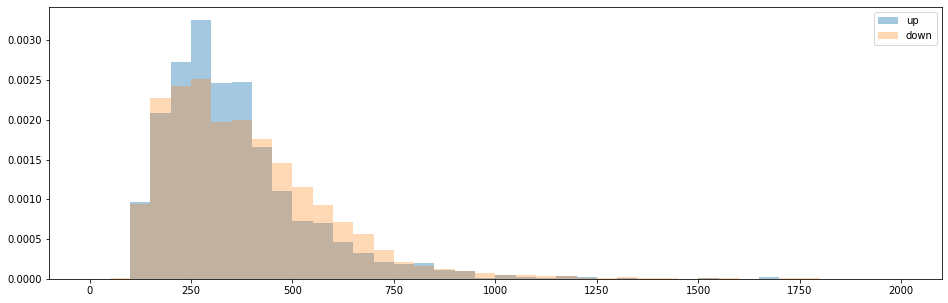

In [622]:
fig = plt.figure(figsize=(16, 5))
plt.hist(f_empty1.loc[(f_empty1['firstgazeup']>0)]['prev_timediff'], bins=40, range=(0,2000), density=True, alpha=0.4, label='up')
plt.hist(f_empty1.loc[(f_empty1['firstgazeup']<=0)]['prev_timediff'], bins=40, range=(0,2000), density=True, alpha=0.3, label='down')
plt.legend(loc='upper right')
plt.show()

In [623]:
#when do we get lookup events?
after_last_letter_count = 0
after_space_count = 0
before_last_letter_count=0
after_backspace_count=0
before_backspace_count=0
distance_from_space=0
total_lookups=0

for idx, row in f_empty.iterrows():
    if row['label']==1:
        total_lookups=total_lookups+1
        if row['end_l']==' ':
            after_last_letter_count=after_last_letter_count+1
        if row['start_l']== ' ':
            after_space_count=after_space_count+1
        if row['start_l']== 'B':
            after_backspace_count=after_backspace_count+1
        if row['end_l']== 'B':
            before_backspace_count=before_backspace_count+1
        if idx<(len(f_empty)-1) and f_empty.iloc[idx+1]['end_l']==' ':
            before_last_letter_count=before_last_letter_count+1

#how many lookups happen at position X after starting to type a word?
from_spc_count = 1
lookups={}
nolookups={}
#for idx, row in f_empty.loc[(f_empty['user']==121) & (f_empty['sentence']==25)].iterrows():
for idx, row in f_empty.iterrows():
    if row['label']==1:
        lookups[from_spc_count]=lookups.get(from_spc_count, 0) + 1
    else:
        nolookups[from_spc_count]=nolookups.get(from_spc_count, 0) + 1
        if row['end_l']=='B':
        #if row['end_l'] == ' ' or row['end_l']=='B':
            from_spc_count=0
        else:
            from_spc_count=from_spc_count+1
    #if from_spc_count==55:
    #    print (row)
            
print(total_lookups, 
      after_last_letter_count, 
      before_last_letter_count,
      after_space_count,
      after_backspace_count, 
      before_backspace_count)

print(lookups)
for key in sorted(lookups):
    print ("%s;%s" % (key, lookups[key]))
        

1694 230 203 117 136 308
{6: 51, 9: 50, 14: 34, 22: 27, 33: 13, 36: 16, 42: 11, 13: 33, 3: 77, 19: 19, 23: 29, 10: 36, 7: 57, 20: 51, 11: 47, 15: 35, 18: 32, 1: 66, 17: 36, 32: 15, 40: 18, 43: 7, 50: 12, 65: 6, 74: 4, 83: 4, 88: 1, 116: 4, 122: 1, 135: 1, 152: 1, 26: 14, 35: 15, 53: 10, 66: 6, 99: 4, 120: 3, 127: 1, 159: 1, 179: 1, 57: 8, 101: 2, 121: 2, 140: 1, 5: 62, 25: 25, 38: 17, 24: 16, 29: 16, 16: 32, 0: 82, 4: 55, 8: 40, 46: 14, 41: 8, 44: 12, 51: 6, 60: 7, 76: 3, 84: 4, 2: 67, 27: 20, 34: 13, 31: 13, 21: 19, 30: 12, 45: 12, 49: 9, 52: 10, 56: 9, 48: 7, 54: 8, 59: 10, 28: 15, 47: 5, 58: 7, 62: 5, 70: 6, 73: 3, 75: 8, 85: 7, 87: 5, 93: 4, 12: 43, 37: 9, 69: 5, 71: 3, 72: 2, 79: 4, 81: 1, 39: 11, 55: 5, 67: 2, 78: 3, 89: 2, 90: 5, 92: 1, 94: 1, 96: 3, 97: 2, 102: 6, 108: 1, 110: 1, 112: 1, 114: 3, 68: 2, 82: 1, 98: 2, 111: 3, 61: 3, 64: 5, 63: 3, 80: 4, 107: 2, 106: 1, 119: 1, 142: 1, 153: 1, 165: 1, 77: 2, 104: 1, 123: 1, 130: 2, 118: 1, 124: 1, 126: 1, 144: 1, 151: 1, 154: 1, 1

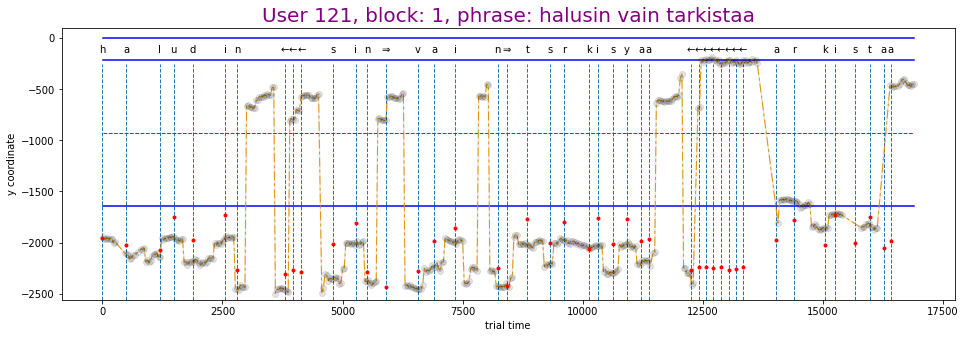

In [624]:
plotusersentence(user_gaze, user_type, dfsent, 121, 25)

In [68]:
f_empty.loc[(f_empty['user']==121) & (f_empty['sentence']==25)]

user  sentence start_l end_l    start_l_x  start_l_y      end_l_x  \
3313   121        25       h     a   768.164060  -1951.250    90.000000   
3314   121        25       a     l    90.000000  -2021.250  1165.429700   
3315   121        25       l     u  1165.429700  -2073.125   856.054700   
3316   121        25       u     d   856.054700  -1748.125   262.968750   
3317   121        25       d     i   262.968750  -1976.875   985.429700   
3318   121        25       i     n   985.429700  -1728.125   999.140600   
3319   121        25       n     B   999.140600  -2273.125  1342.265600   
3320   121        25       B     B  1342.265600  -2306.875  1360.546900   
3321   121        25       B     B  1360.546900  -2273.125  1347.539100   
3322   121        25       B     s  1347.539100  -2285.000   181.054690   
3323   121        25       s     i   181.054690  -2015.000   964.335940   
3324   121        25       i     n   964.335940  -1803.750   978.398440   
3325   121        25       n         978.398440  -2283.125   825.117200   
3326   121        25             v   825.117200  -2435.000   738.281250   
3327   121        25       v     a   738.281250  -2281.250    79.804690   
3328   121        25       a     i    79.804690  -1985.000   917.226560   
3329   121        25       i     n   917.226560  -1855.000   980.156250   
3330   121        25       n         980.156250  -2253.125   934.101560   
3331   121        25             t   934.101560  -2428.125   627.187500   
3332   121        25       t     s   627.187500  -1765.000   140.976560   
3333   121        25       s     r   140.976560  -2003.125   487.968750   
3334   121        25       r     k   487.968750  -1798.750  1003.359400   
3335   121        25       k     i  1003.359400  -2061.250   988.242200   
3336   121        25       i     s   988.242200  -1758.125   228.867190   
3337   121        25       s     y   228.867190  -2016.875   680.976560   
3338   121        25       y     a   680.976560  -1771.250   119.882810   
3339   121        25       a     a   119.882810  -1986.250   107.929690   
3340   121        25       a     B   107.929690  -1965.000  1329.257800   
3341   121        25       B     B  1329.257800  -2266.250  1324.335900   
3342   121        25       B     B  1324.335900  -2241.875  1320.468800   
3343   121        25       B     B  1320.468800  -2236.875  1341.562500   
3344   121        25       B     B  1341.562500  -2251.875  1327.500000   
3345   121        25       B     B  1327.500000  -2238.750  1329.257800   
3346   121        25       B     B  1329.257800  -2265.000  1347.539100   
3347   121        25       B     B  1347.539100  -2258.750  1347.539100   
3348   121        25       B     a  1347.539100  -2241.875    93.867190   
3349   121        25       a     r    93.867190  -1978.125   480.937500   
3350   121        25       r     k   480.937500  -1783.750  1014.257800   
3351   121        25       k     i  1014.257800  -2023.125   991.406250   
3352   121        25       i     s   991.406250  -1731.250   195.820310   
3353   121        25       s     t   195.820310  -2000.000   616.992200   
3354   121        25       t     a   616.992200  -1745.000    62.929688   
3355   121        25       a     a    62.929688  -2051.875   105.820310   

       end_l_y  samelett  timediff  start_s  end_s  start_b  end_b  \
3313 -2021.250         0       493        0      0        0      0   
3314 -2073.125         0       697        0      0        0      0   
3315 -1748.125         0       295        0      0        0      0   
3316 -1976.875         0       401        0      0        0      0   
3317 -1728.125         0       674        0      0        0      0   
3318 -2273.125         0       240        0      0        0      0   
3319 -2306.875         0      1001        0      0        0      1   
3320 -2273.125         1       170        0      0        1      1   
3321 -2285.000         1       172        0      0        1      1   
3322 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [23]:
def plot_2d_space(X, y, label='Classes'):   
    fig = plt.figure(figsize=(16, 5))
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m,
            alpha = 0.1
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [24]:
clf = svm.SVC(gamma=0.001)
feature_cols=['prev_samelett', 'prev_timediff','prev_start_s', 'prev_end_s', 'prev_start_b', 'prev_end_b']
y = f_empty1['label']
X = f_empty1[feature_cols]

pca = PCA(n_components=2)

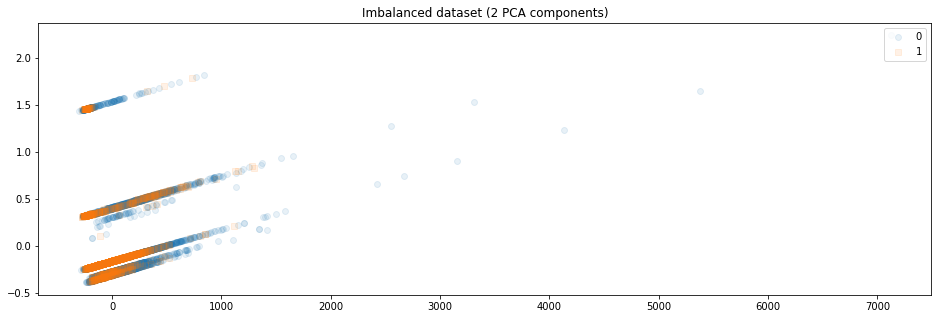

In [25]:
Xk = pca.fit_transform(X)
plot_2d_space(Xk, y, 'Imbalanced dataset (2 PCA components)')

/Users/ako2/Documents/PythonProjects/AttentionShift/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


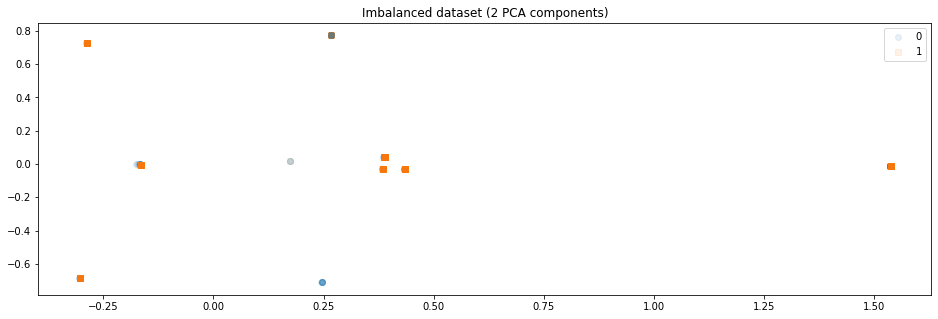

In [479]:
scaler = MinMaxScaler()

X[['prev_timediff']] = scaler.fit_transform(X[['prev_timediff']])

Xk = pca.fit_transform(X)
plot_2d_space(Xk, y, 'Imbalanced dataset (2 PCA components)')

In [465]:
X

prev_samelett  prev_timediff  prev_start_s  prev_end_s  prev_start_b  \
1                0.0       0.051044           0.0         0.0           0.0   
2                0.0       0.073670           0.0         0.0           0.0   
3                0.0       0.071515           0.0         0.0           0.0   
4                0.0       0.086195           0.0         1.0           0.0   
5                0.0       0.068687           1.0         0.0           0.0   
...              ...            ...           ...         ...           ...   
12786            1.0       0.010101           0.0         0.0           1.0   
12787            1.0       0.010101           0.0         0.0           1.0   
12788            1.0       0.008485           0.0         0.0           1.0   
12789            1.0       0.053737           0.0         0.0           1.0   
12790            0.0       0.123906           0.0         0.0           1.0   

       prev_end_b  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
5             0.0  
...           ...  
12786         1.0  
12787         1.0  
12788         1.0  
12789         1.0  
12790         0.0  

[12251 rows x 6 columns]

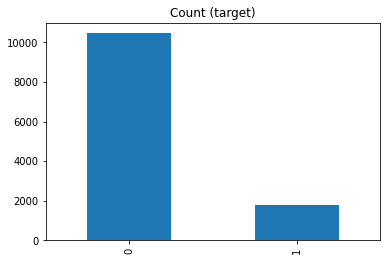

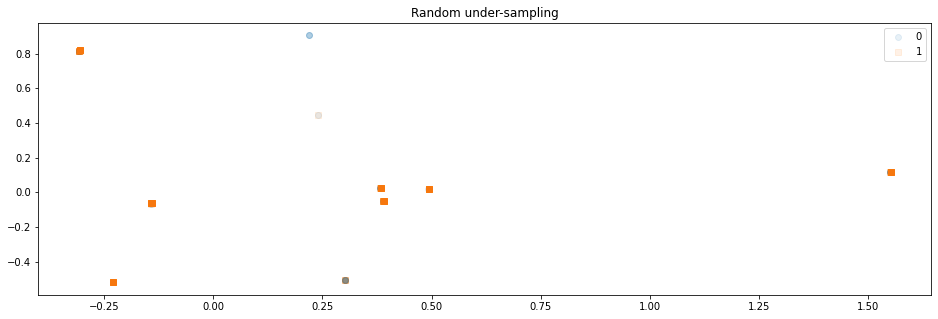

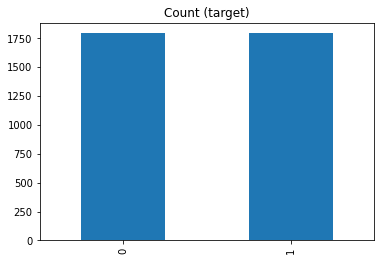

In [466]:
#undersample train set (X)
f_empty1.label.value_counts().plot(kind='bar', title='Count (target)');

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

Xk = pca.fit_transform(X_rus)

plot_2d_space(Xk, y_rus, 'Random under-sampling')
y_rus.value_counts().plot(kind='bar', title='Count (target)');


In [472]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [473]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [474]:
predicted = clf.predict(X_test)
print(predicted)
print(y_test.tolist())

[0 0 0 ... 0 0 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [475]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2095
           1       0.00      0.00      0.00       356

    accuracy                           0.85      2451
   macro avg       0.43      0.50      0.46      2451
weighted avg       0.73      0.85      0.79      2451




/Users/ako2/Documents/PythonProjects/AttentionShift/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ako2/Documents/PythonProjects/AttentionShift/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ako2/Documents/PythonProjects/AttentionShift/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Confusion matrix:
[[2095    0]
 [ 356    0]]


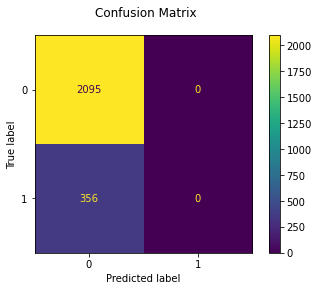

In [476]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [105]:

alignment = dtw(f_empty.iloc[2]['gazedata'], f_empty.iloc[17]['gazedata'], keep_internals=True)
print(alignment.distance)
alignment = dtw(f_empty.iloc[2]['smgzdata'], f_empty.iloc[17]['smgzdata'], keep_internals=True)
print(alignment.distance)

4595.480847999999
0.0


In [106]:
alignment.plot(type="twoway")


ValueError: cannot convert float NaN to integer

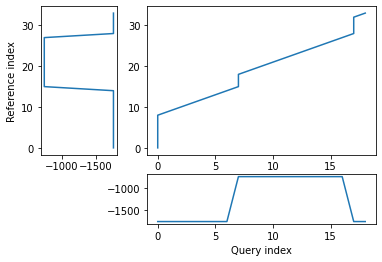

<AxesSubplot:>

In [94]:
alignment.plot(type="threeway")

In [11]:
uniqueletters = dftyping.drop_duplicates(subset=['event'])[['event']]


number_of_colors = len(uniqueletters)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
uniqueletters['cols']=color
uniqueletters

event     cols
0         m  #3421B3
1         i  #76C7B9
2         t  #C5E564
3         ä  #C60CD2
4            #8FD49D
5         s  #75809B
7         n  #878890
10        l  #47E86A
11        u  #5A7D43
14        r  #425D83
16        B  #7901AF
18        e  #FC3802
20        p  #BC1B57
25        k  #0D1B0E
26        ö  #64E57B
31        d  #A76D19
35        j  #3800CC
41        a  #33811A
48        o  #88FB29
72        y  #383026
78        h  #A9B986
80        v  #83183C
295       g  #F6D070
664       b  #7C64D0
1168      w  #F5B93F
1658      å  #E736A4
9463      q  #FDE1BA
10172     f  #51DF67
15310     c  #1DD148
31354     z  #B2AA3C

In [12]:
def find_col(evt):
    match = uniqueletters.loc[(uniqueletters['event']==evt)]
    #print(match)
    return match.iloc[0]['cols']

find_col('v')
#list(map(find_col, dftyping2['event']))


'#83183C'

In [366]:
#invert y coordinates
dftyping2=dftyping
dftyping2['touchy']=dftyping['touchy']*-1
#dftyping2['col'] = list(map(ord, dftyping2['event']))
dftyping2['col2'] = list(map(find_col, dftyping2['event']))



In [395]:
#unique letters in phrase set
set(dfsent.sentence.apply(list).sum())

{' ',
 'a',
 'd',
 'e',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'y',
 'ä',
 'ö'}

In [488]:
#find all keys pressed at the start of a look up event
dflooks = f_empty.loc[(f_empty['firstgazeup']>0)].copy()
#dflooks['start_l_y'] = dflooks['start_l_y']*-1
print(len(dflooks))
dflooks.loc[(dflooks['start_l']=='a')]

1822


user  sentence start_l end_l   start_l_x  start_l_y      end_l_x  \
132     120        51       a     a  111.796875  -2023.750   118.828125   
171     120         1       a     n   84.726560  -2003.750   991.406250   
242     120        32       a     a   84.726560  -2008.750    99.843750   
287     120        13       a     a   87.890625  -2006.875   123.750000   
299     120        43       a         97.734375  -2006.875   803.320300   
...     ...       ...     ...   ...         ...        ...          ...   
12692   111        47       a     a   34.804688  -1978.125    25.664062   
12693   111        47       a     B   25.664062  -2016.250  1276.523400   
12734   111        28       a     n   69.960940  -2003.125   997.382800   
12762   111        67       a     m   30.937500  -2041.250  1056.445300   
12783   111        63       a     B   53.789062  -1981.250  1256.484400   

        end_l_y  samelett  timediff  ...  prev_timediff  prev_samelett  \
132   -2018.750         1       174  ...          672.0            0.0   
171   -2225.000         0      1170  ...          680.0            0.0   
242   -2006.250         1       226  ...          463.0            0.0   
287   -1995.000         1       178  ...          597.0            0.0   
299   -2396.875         0       725  ...          569.0            0.0   
...         ...       ...       ...  ...            ...            ...   
12692 -2016.250         1       684  ...          402.0            0.0   
12693 -2223.125         0       794  ...          684.0            1.0   
12734 -2288.125         0      1178  ...          156.0            1.0   
12762 -2291.875         0       923  ...          592.0            0.0   
12783 -2193.750         0      1757  ...          462.0            0.0   

       prev_start_s  prev_end_s  prev_start_b prev_end_b prev_gaze_up_pct  \
132             0.0         0.0           0.0        0.0         0.000000   
171             0.0         0.0           0.0        0.0         0.000000   
242             0.0         0.0           0.0        0.0         0.000000   
287             0.0         0.0           0.0        0.0         0.000000   
299             0.0         0.0           0.0        0.0         0.000000   
...             ...         ...           ...        ...              ...   
12692           0.0         0.0           0.0        0.0         0.000000   
12693           0.0         0.0           0.0        0.0         0.380952   
12734           0.0         0.0           0.0        0.0         0.000000   
12762           0.0         0.0           0.0        0.0         0.388889   
12783           0.0         0.0           0.0        0.0         0.000000   

       prev_firstgazeup  prev_start_l_x  prev_start_l_y  
132           -0.047619      850.078100       -1991.875  
171           -0.047619      999.140600       -1791.875  
242           -0.071429      586.054700       -1773.750  
287           -0.058824     1129.218800       -2213.125  
299           -0.058824     1124.296900       -1976.875  
...                 ...             ...             ...  
12692         -0.083333      774.140600       -1991.250  
12693          0.428571       34.804688       -1978.125  
12734         -0.200000       34.804688       -2023.750  
12762          0.500000      969.257800       -1776.875  
12783         -0.071429      627.187500       -1791.875  

[164 rows x 29 columns]

In [432]:
#keyboard coords
dfkeys = pd.read_csv('How_we_type_mobile_dataset_typing_log/Keyboard_coordinates-Copy1.csv', delimiter='\t')
dfkeys['x']=dfkeys['x']-500
dfkeys['y']=dfkeys['y']*-1 + 200
#dfkeys

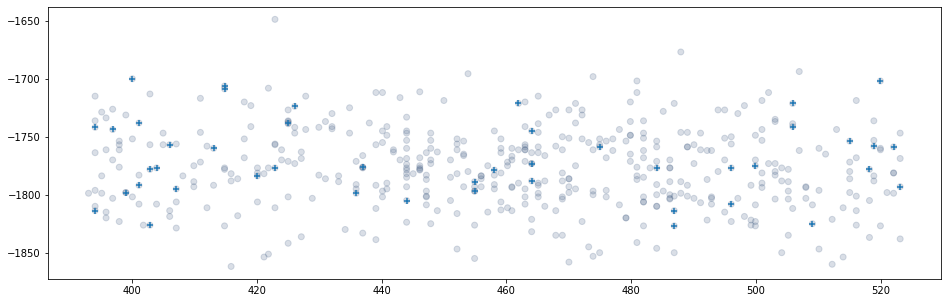

In [437]:
fig = plt.figure(figsize=(16, 5))
plt.scatter(data=dftyping.loc[(dftyping['event']=='r')], x='touchx', y='touchy', \
            c='col2',\
            alpha=0.2)
plt.scatter(data=dflooks.loc[(dflooks['start_l']=='r')], x='start_l_x', y='start_l_y', alpha=1, marker='+')
plt.show()

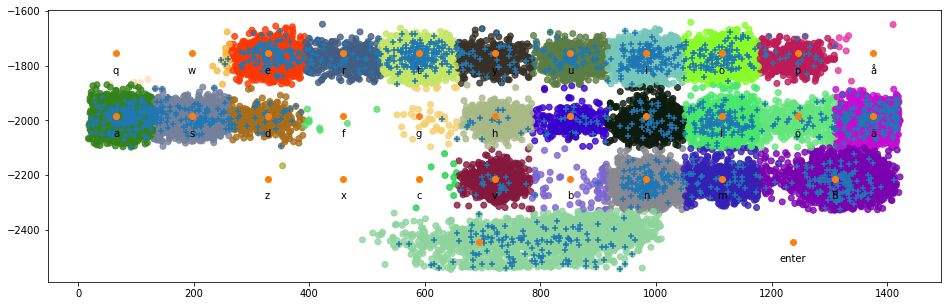

In [445]:
fig = plt.figure(figsize=(16, 5))

plt.scatter(data=dftyping, x='touchx', y='touchy', \
            c='col2',\
            alpha=0.8)
plt.scatter(data=dflooks, x='start_l_x', y='start_l_y', alpha=1, marker='+')
plt.scatter(data=dfkeys, x='x', y='y')
for idx, row in dfkeys.iterrows():
    plt.annotate(row['keys'], # this is the text
                         (row['x'],row['y']), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,-20), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
plt.show()

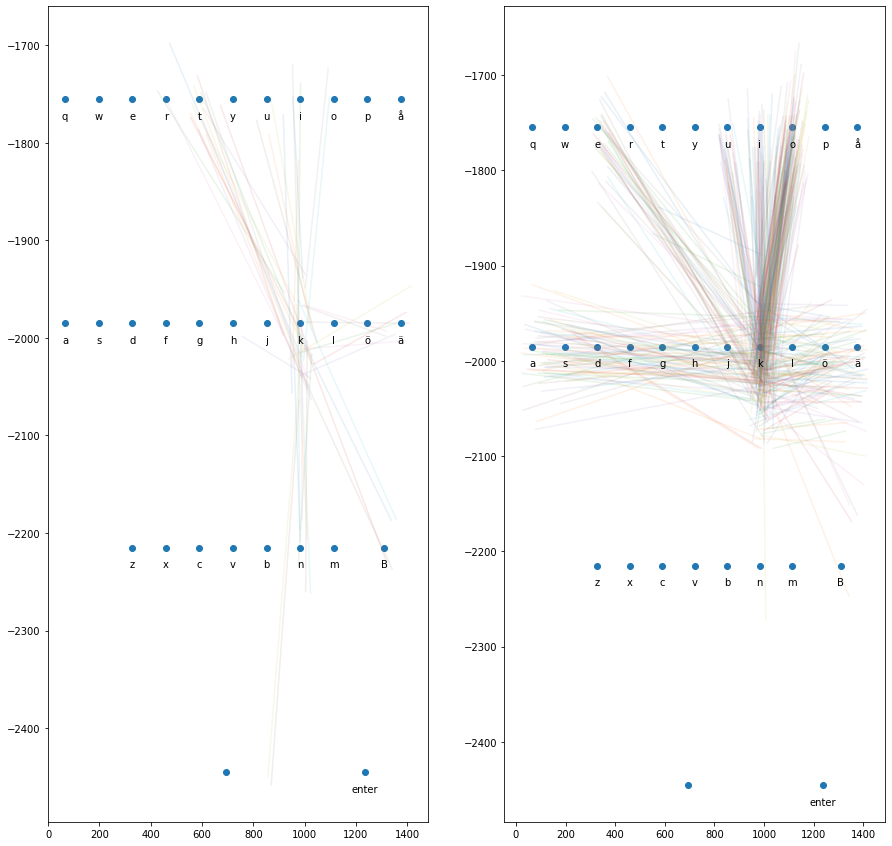

In [517]:
dfnolooks = f_empty.loc[(f_empty['firstgazeup']<=0)]

letter_of_interest = 'k'
figure, axis = plt.subplots(1, 2, figsize=(15,15))

#axis[0].scatter(data=dflooks, x='start_l_x', y='start_l_y', alpha=1, marker='+')
axis[0].scatter(data=dfkeys, x='x', y='y')
for idx, row in dfkeys.iterrows():
    axis[0].annotate(row['keys'], # this is the text
                         (row['x'],row['y']), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,-20), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
for idx, row in dflooks.loc[dflooks['start_l'] == letter_of_interest].iterrows():
    axis[0].plot([row['start_l_x'],row['prev_start_l_x']], [row['start_l_y'], row['prev_start_l_y']], alpha = 0.1)

#axis[0, 1].scatter(data=dfnolooks, x='start_l_x', y='start_l_y', alpha=1, marker='+')
axis[1].scatter(data=dfkeys, x='x', y='y')
for idx, row in dfkeys.iterrows():
    axis[1].annotate(row['keys'], # this is the text
                         (row['x'],row['y']), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,-20), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
for idx, row in dfnolooks.loc[dfnolooks['start_l'] == letter_of_interest].iterrows():
    axis[1].plot([row['start_l_x'],row['end_l_x']], [row['start_l_y'], row['end_l_y']], alpha = 0.1)

plt.show()

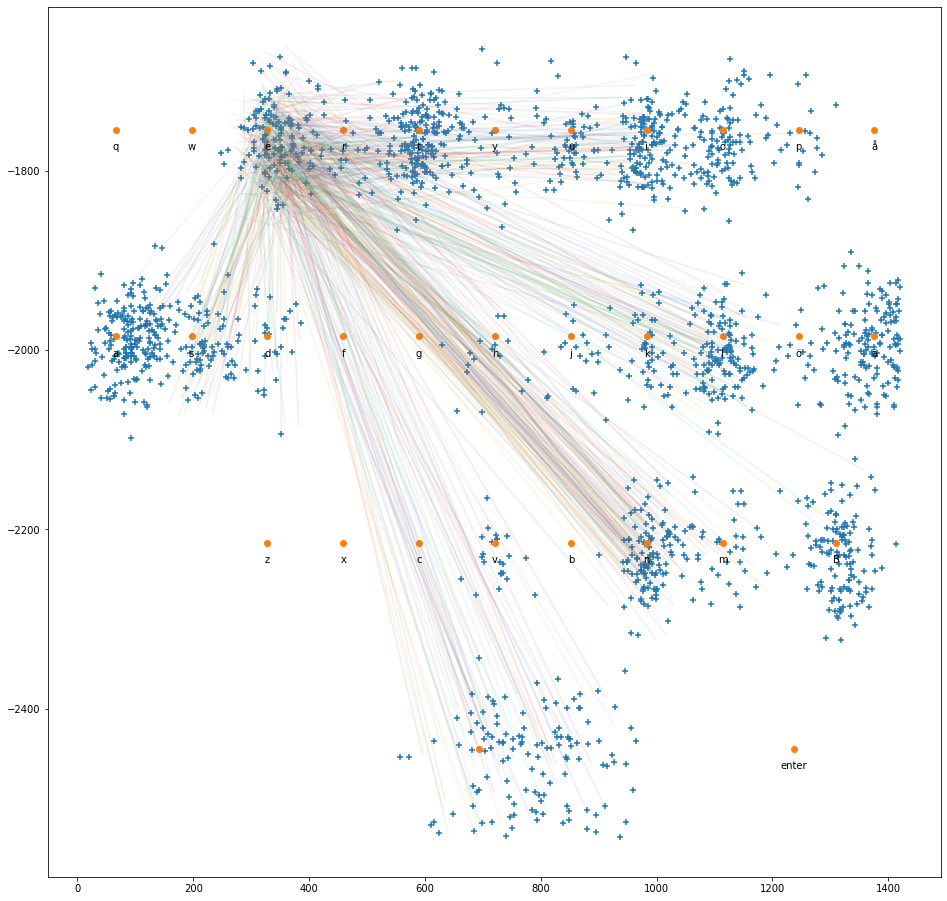

In [505]:
fig = plt.figure(figsize=(16, 16))

#plt.scatter(data=dftyping, x='touchx', y='touchy', \
#            c='col2',\
#            alpha=0.8)
plt.scatter(data=dflooks, x='start_l_x', y='start_l_y', alpha=1, marker='+')
plt.scatter(data=dfkeys, x='x', y='y')
for idx, row in dfkeys.iterrows():
    plt.annotate(row['keys'], # this is the text
                         (row['x'],row['y']), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,-20), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
for idx, row in dfnolooks.loc[dfnolooks['start_l'] == 'e'].iterrows():
    plt.plot([row['start_l_x'],row['end_l_x']], [row['start_l_y'], row['end_l_y']], alpha = 0.1)
plt.show()



In [ ]:
n={' ',
 'a',
 'd',
 'e',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'y',
 'ä',
 'ö'}


In [233]:
dftyping2.head()

systime   id  block  sentence_n  trialtime event  \
0  1536560828358  120      1          66          0     m   
1  1536560828816  120      1          66        458     i   
2  1536560829442  120      1          66       1084     t   
3  1536560830052  120      1          66       1694     ä   
4  1536560830771  120      1          66       2413         

                          layout message      touchx    touchy   col  
0  qwertyuiopåasdfghjklöäzxcvbnm       m  1158.39840  2213.750  1090  
1  qwertyuiopåasdfghjklöäzxcvbnm      mi   987.18750  1766.250  1050  
2  qwertyuiopåasdfghjklöäzxcvbnm     mit   613.12500  1821.250  1160  
3  qwertyuiopåasdfghjklöäzxcvbnm    mitä  1378.47660  1956.875  2280  
4  qwertyuiopåasdfghjklöäzxcvbnm   mitä    815.27344  2451.250   320

In [444]:
#probability of a lookup after each key
dfkeys['keys'].replace('<', 'B', inplace=True)
dfkeys['keys'].replace('_', ' ', inplace=True)
for idx, row in dfkeys.iterrows():
    try:
        prob = len(dflooks.loc[(dflooks['start_l']==row['keys'])]) / len(dftyping.loc[(dftyping['event']==row['keys'])])
    except:
        prob = -1
    print (row['keys'], prob)

q 0.0
w 0.16666666666666666
e 0.07389460932768019
r 0.09375
t 0.07283702213279677
y 0.0985576923076923
u 0.059959349593495935
i 0.05889621087314662
o 0.05872193436960276
p 0.04892367906066536
å 0.0
a 0.05981035740335521
s 0.056780595369349506
d 0.0948509485094851
f 0.0
g 0.023255813953488372
h 0.02564102564102564
j 0.06930693069306931
k 0.04131534569983136
l 0.0705950991831972
ö 0.06532663316582915
ä 0.06425891181988742
z 0.0
x -1
c 0.0
v 0.02972972972972973
b 0.028985507246376812
n 0.050855085508550855
m 0.0475
B 0.03404924044002095
  0.04412811387900356
enter -1
